# Байесовская статистика
## Задание BS.5


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 60 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 70 баллов
* Задача 5 &mdash; 60 баллов
---

In [1]:
# Bot check

# HW_ID: ds_bs5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [152]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import time

import pymc as pm
import arviz as az

from statsmodels.tsa.stattools import acf, pacf
from sklearn.datasets import make_blobs

sns.set(font_scale=1.2, style="whitegrid", palette="Set2")

In [ ]:
import arviz as az

from statsmodels.tsa.stattools import acf, pacf
from sklearn.datasets import make_blobs

sns.set(font_scale=1.2, style="whitegrid", palette="Set2")

___
### Задача 1

Реализуйте функцию, для генерации выборки из экспоненциального распределения с параметром 1 с помощью гамильтонова MCMC.

Плотность экспоненциального распределения с параметром $\lambda = 1$:
$$
\begin{equation*}
    f(x) = e^{-x}
\end{equation*}
$$

Из примера с лекции:
$$
x_k = v_{k-1} t+x_{k-1}-\frac{t^2}{2}
$$

In [43]:
def hamilton_sample(x_0, t, size=2000, tune=500):
    """
    :param x_0: стартовая координата
    :param t: время, на которое запускается динамика
    :param size: конечный размер выборки
    :param tune: количество семплирований для настройки цепи
    """

    if x_0 < 0:
        return np.inf

    sample = []
    x_prev = x_0
    v_k = sps.norm.rvs(0, 1, size=size + tune)
    for i in range(size + tune):
        x_k = np.abs(v_k[i] * t + x_prev - (t**2) * 0.5)
        sample.append(x_k)
        x_prev = x_k

    return np.array(sample[tune:])

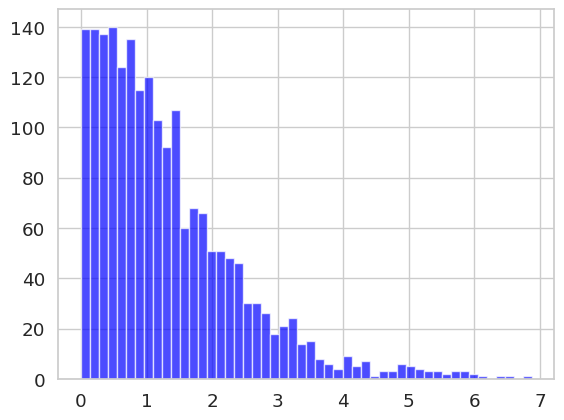

In [ ]:
sample = hamilton_sample(0, 1)
plt.hist(sample, bins=50, alpha=0.7, color="blue")
plt.show()

Исследуйте, как на полученную выборку влияет начальное приближение и время динамики $t$. Сравнение производите по гистограммам.

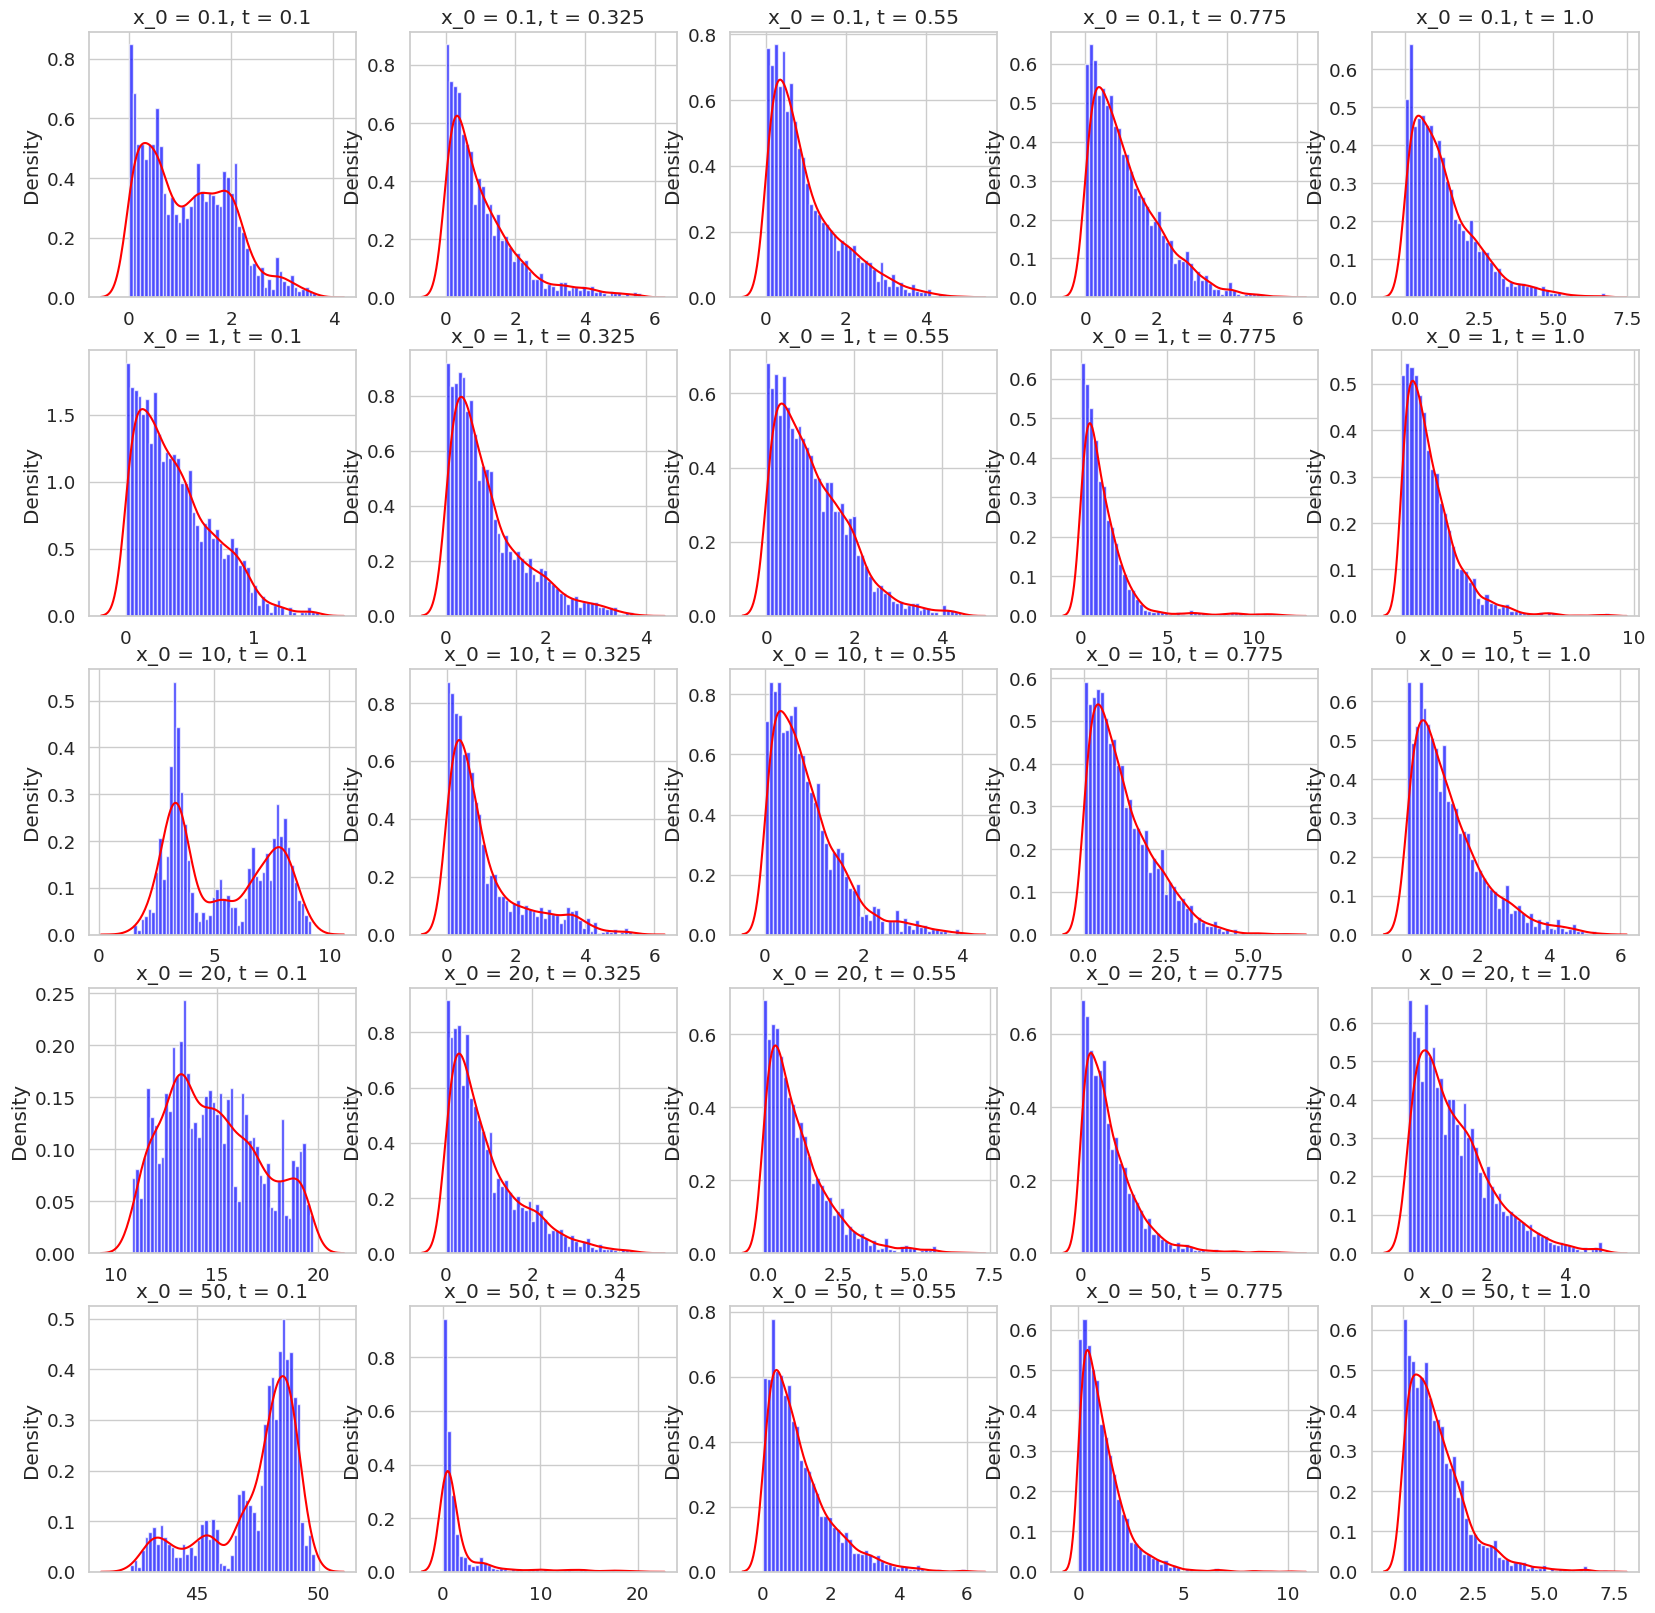

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
x_0_vals = [0.1, 1, 10, 20, 50]
t_vals = np.linspace(0.1, 1, 5)

for i, x_0 in enumerate(x_0_vals):
    for j, t in enumerate(t_vals):
        y = hamilton_sample(x_0, t, size=2000)
        axs[i, j].hist(y, bins=50, alpha=0.7, color="blue", density=True)
        sns.kdeplot(y, ax=axs[i, j], color="red")
        axs[i, j].set_title(f"x_0 = {x_0}, t = {t}")

plt.show()

Выберите оптимальные параметры и сравните результат с методами Rejection sampling и схемой Метрополиса-Хастингса. Сравнение произведите по следующим характеристикам:
* гистограмма по сгенерированной выборке в сравнении с истинной плотностью;
* математическое ожидание и дисперсия по сгенерированной выборке в сравнении с истинными значениями;
* автокорреляционная функция по сгенерированной "выборке";
* время работы.

Для сравнения не используйте те данные, по которым цепь производила настройку.

Для распределения Гамильтона возьмем $x_0 = 1$ и $t = 1$

Для rejection sampling возьмем константу $M = 10$ и равномерное распределение, тогда значения плотности экспоненциального распределния на отрезке от $0$ до $10$ не превосхдят $e^-1$, а значит и $1$

In [ ]:
def draw_hist(data, title="histogram of distribution"):
    plt.figure(figsize=(10, 5))
    sns.histplot(data, kde=True, bins=20)
    plt.title(title)
    plt.xlabel("value")
    plt.ylabel("frequency")
    plt.show()

1) Rejection sampling

In [7]:
def rejection_sampling(n, q, p, M):
    samples = []
    while len(samples) < n:
        y = q.rvs(size=1)[0]
        if not (-10 < y < 10):
            continue

        q_y = q.pdf(y)
        p_y = p(y)
        alpha = p_y / (M * q_y)

        if alpha > 1:
            raise ValueError(f"M слишком мал: α={alpha:.2f} > 1 при y={y}")

        if np.random.rand() <= alpha:
            samples.append(y)
            print(f"len(samples) = {len(samples)}", end="\r")

    return np.array(samples)

In [15]:
n = 2000
rejection_distr = sps.uniform(0, 10)
rej_const = 10
start_time = time.time()

rejection_sample = rejection_sampling(n, rejection_distr, sps.expon().pdf, rej_const)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
print(f"Мат. ожидание: {np.mean(rejection_sample)}")
print(f"Дисперсия: {np.var(rejection_sample)}")

Time taken: 9.895702362060547 seconds
Мат. ожидание: 0.9728594083615251
Дисперсия: 0.962779125841706


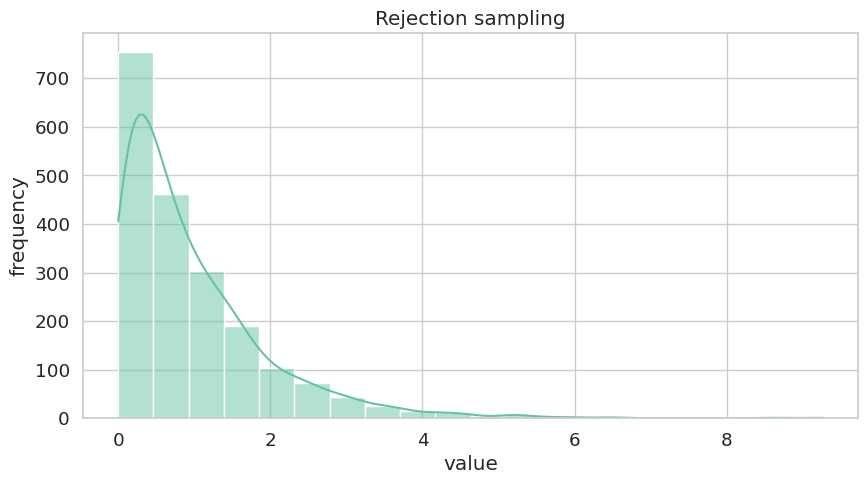

In [23]:
draw_hist(rejection_sample, title="Rejection sampling")

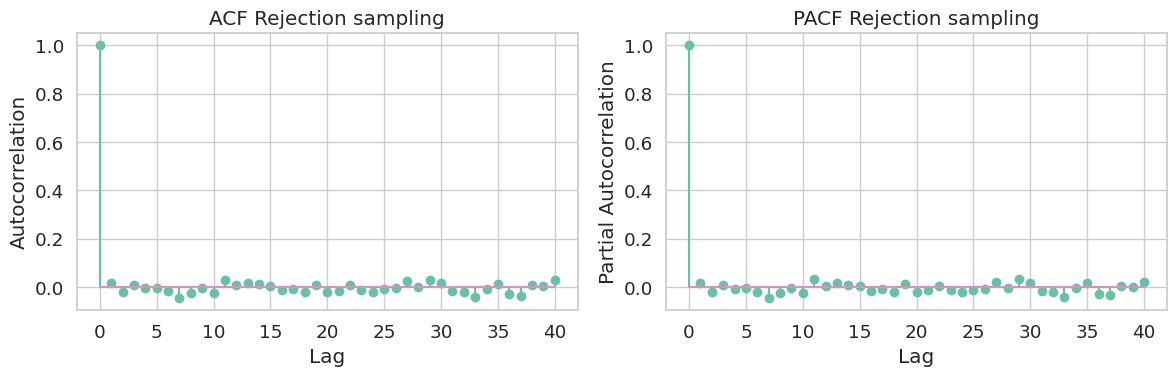

In [ ]:
def plot_acf_pacf(x, nlags: int = 40, title: str = ""):
    acf_vals = acf(x, nlags=nlags, fft=True)
    pacf_vals = pacf(x, nlags=nlags, method="yw_adjusted")

    lags = range(len(acf_vals))

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].stem(lags, acf_vals)
    axes[0].set_title(f"ACF {title}")
    axes[0].set_xlabel("Lag")
    axes[0].set_ylabel("Autocorrelation")
    axes[0].grid(True)

    axes[1].stem(lags, pacf_vals)
    axes[1].set_title(f"PACF {title}")
    axes[1].set_xlabel("Lag")
    axes[1].set_ylabel("Partial Autocorrelation")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_acf_pacf(rejection_sample, title="Rejection sampling")

2) Метрополис-Хастингс

In [ ]:
def Metropolis_Hastings(n, p):
    warm_iterations = 1000
    sample = []
    counter = 0
    x_prev = 0
    while len(sample) < n:
        print(f"conuter: {len(sample)} / {n}", end="\r")

        y = sps.norm(loc=x_prev, scale=1).rvs(size=1)[0]

        numerator = sps.norm(loc=y, scale=1).pdf(x_prev) * p(y)
        denominator = sps.norm(loc=x_prev, scale=1).pdf(y) * p(x_prev) + 1e-15
        fraction = numerator / denominator
        prob = np.random.binomial(n=1, p=np.min([1, fraction]))
        if prob == 1:
            x_prev = y
        counter += 1

        if counter > warm_iterations and np.abs(x_prev) < 10:
            sample.append(x_prev)
    return np.array(sample)

In [30]:
n = 2000
start_time = time.time()

metropolis_sample = Metropolis_Hastings(n, sps.expon().pdf)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
print(f"Мат. ожидание: {np.mean(metropolis_sample)}")
print(f"Дисперсия: {np.var(metropolis_sample)}")

Time taken: 11.277698040008545 seconds
Мат. ожидание: 1.046437503355135
Дисперсия: 1.141721201835488


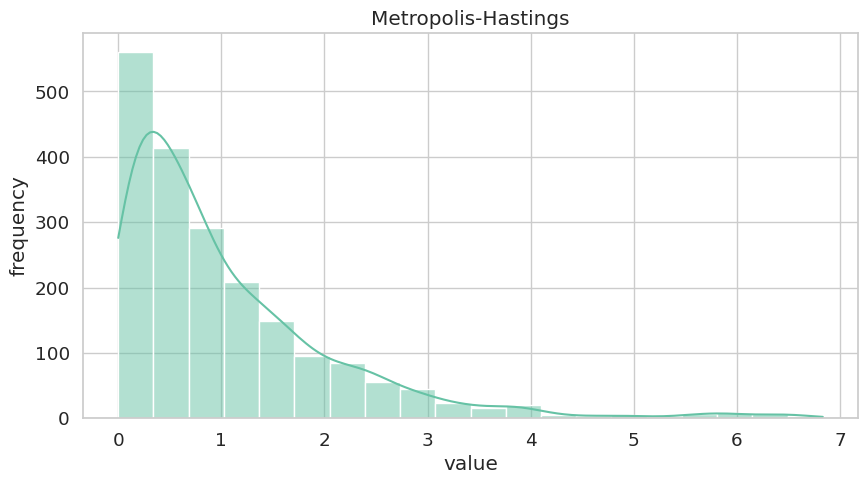

In [ ]:
draw_hist(metropolis_sample, title="Metropolis-Hastings")

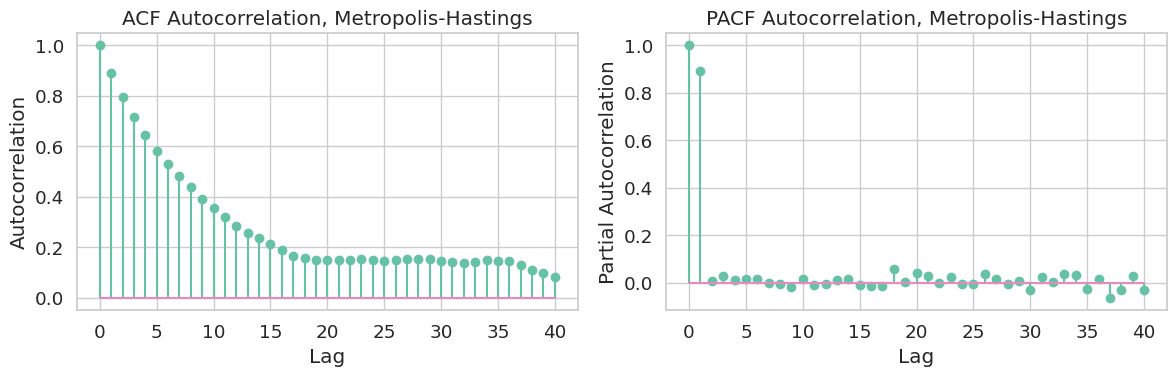

In [ ]:
plot_acf_pacf(metropolis_sample, title="Autocorrelation, Metropolis-Hastings")

3) Гамильтонова динамика

In [68]:
start_time = time.time()

ham_sample = hamilton_sample(50, 0.5)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
print(f"Мат. ожидание: {np.mean(ham_sample)}")
print(f"Дисперсия: {np.var(ham_sample)}")

Time taken: 0.00964808464050293 seconds
Мат. ожидание: 1.102056327367654
Дисперсия: 1.1854439013603812


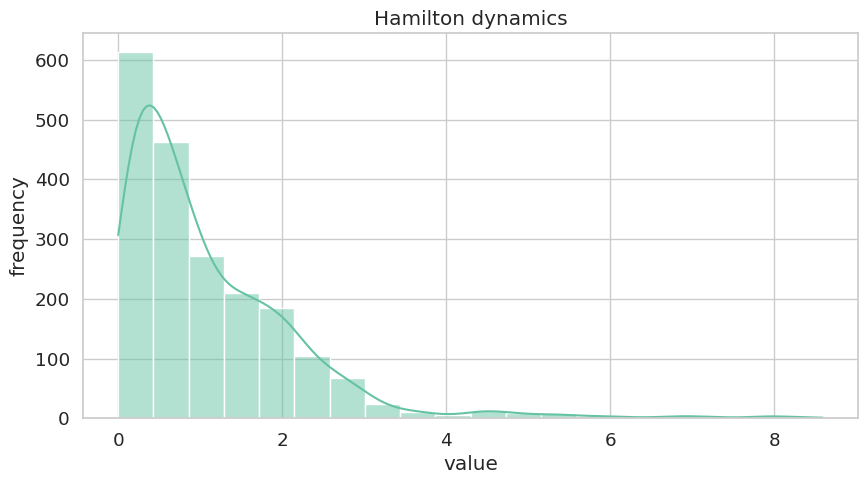

In [69]:
draw_hist(ham_sample, "Hamilton dynamics")

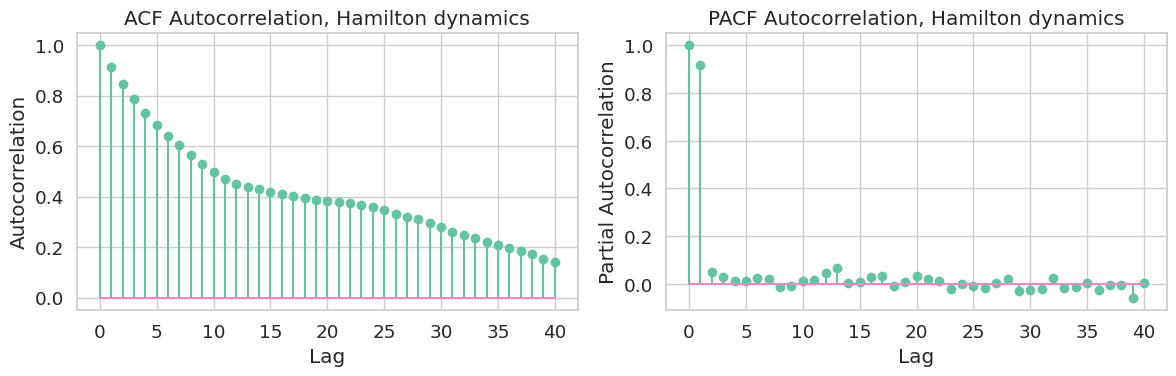

In [ ]:
plot_acf_pacf(ham_sample, title="Autocorrelation, Hamilton dynamics")

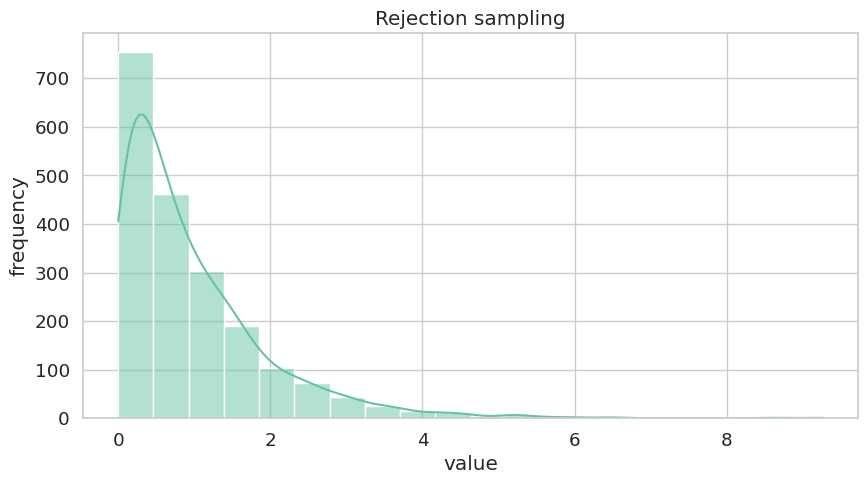

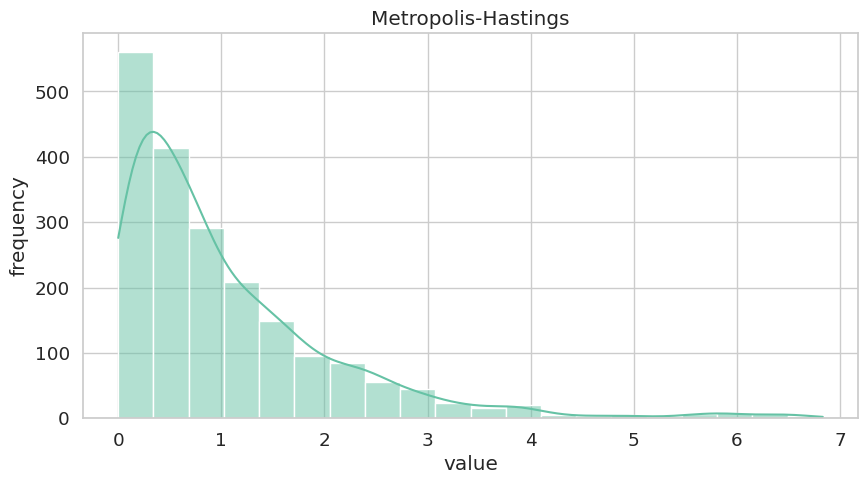

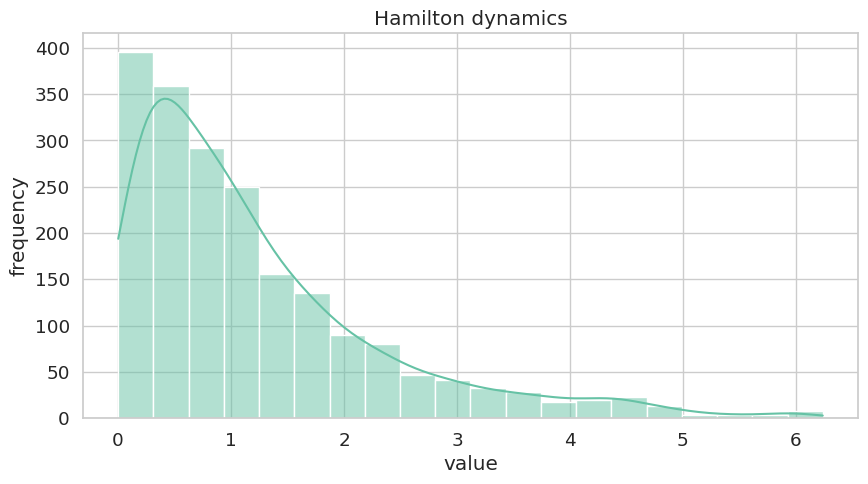

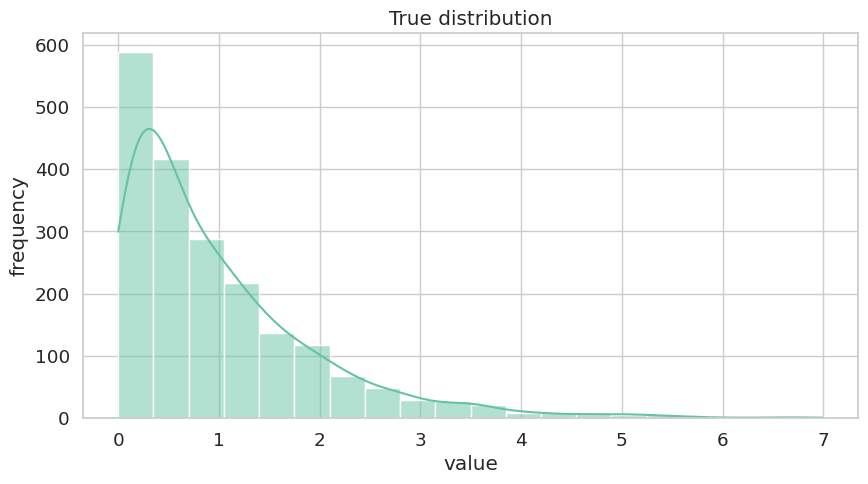

In [ ]:
true_sample = sps.expon().rvs(2000)

draw_hist(rejection_sample, "Rejection sampling")
draw_hist(metropolis_sample, "Metropolis-Hastings")
draw_hist(ham_sample, "Hamilton dynamics")
draw_hist(true_sample, "True distribution")

Сделайте выводы

Как видим, распределение Гамильтона получилось чуть хуже чем в случае rejection и metropolis-hastings, но и генерация выборки Гамильтона заняла меньше времени.

Автокорреляции Гамильтона похожи на автокорреляции Метрополис-Хастингса.

__________________
### Задача 2

Сравним три семплера из PyMC:
* `pm.Metropolis` &mdash; схема Метрополиса-Хастингса;
* `pm.HamiltonianMC` &mdash; динамика Гамильтона в MCMC;
* `pm.NUTS` &mdash; расширение динамики Гамильтона с автоматическим подбором гиперпараметров.




Для сравнения рассмотрим следующие модели

1. $\theta \sim \mathcal{N}(0, 1) \\ X_1, ..., X_n\ |\ \theta \sim \mathcal{N}(\theta, 1)$
---
2. $\theta_1 \sim \mathcal{N}(0, 1) \\ \theta_2 \sim HalfNormal(1) \\ X_1, ..., X_n\ |\ \theta \sim \mathcal{N}(\theta_1, \theta_2)$
---
3. $\theta_1 \sim U(0, 10) \\ \theta_2 \sim HalfNormal(1) \\ X_1, ..., X_n\ |\ \theta \sim \mathcal{N}(\theta_1, \theta_2)$
---

Реализуйте эти модели. 

*Примечания.*
1. Во избежание дублирования кода рекомендуется каждую модель сделать в виде функции с параметром `step`, в качестве которого передавать класс семплера (см. выше). В вызове функции `pm.sample` в таком случае необходимо указать `step=step()`, то есть инициализировать семплер внутри контекста модели. 
2. Поскольку мы хотим исследовать семплеры, в каждой модели стоит запускать только одну цепь, указав параметр `chains=1` в `pm.sample`.
3. Для корректности сравнения для всех семплеров нужно использовать одну наблюдаемую выборку.

In [86]:
def get_model(model_idx, observed_data, step):
    with pm.Model() as model:
        if model_idx == 1:
            theta = pm.Normal("theta", 0, 1)
            X = pm.Normal("x", mu=theta, sigma=1, observed=observed_data)
        elif model_idx == 2:
            theta_1 = pm.Normal("theta_1", 0, 1)
            theta_2 = pm.HalfNormal("theta_2", 1)
            X = pm.Normal("x", mu=theta_1, sigma=theta_2, observed=observed_data)
        elif model_idx == 3:
            theta_1 = pm.Uniform("theta_1", 0, 10)
            theta_2 = pm.HalfNormal("theta_2", 1)
            X = pm.Normal("x", mu=theta_1, sigma=theta_2, observed=observed_data)
        trace = pm.sample(
            step=step(), chains=1, discard_tuned_samples=False, progressbar=False
        )
    return model, trace

def generate_sample(model_idx, sample_size=100):
    if model_idx == 1:
        return np.random.normal(0.5, 1, sample_size)
    elif model_idx == 2:
        return np.random.normal(0.5, 1.5, sample_size)
    elif model_idx == 3:
        return np.random.uniform(5, 10, sample_size) + np.random.normal(0, 1.5, sample_size)

Для сравнения семплеров используйте следующие характеристики.
1. Автокорреляционную функцию, которую можно получить с помощью `arviz.plot_autocorr(trace.posterior[param_name].T)` из пакета `arviz`.
2.  Эффективный размер выборки (effective sample size, ESS) &mdash; размер выборки, скорректированный с учетом автокорреляций в сгенерированном наборе. Иначе говоря, это размер "настоящей" выборки, которая содержит столько же информации, сколько полученный сгенерированный набор. Его можно получить с помощью `arviz.ess(trace)[param_name].values` из пакета `arviz`. Для информативности его переводят в проценты относительно общего объема сгенерированных данных.
3. Визуализацию полной трассировки сгенерированных чисел, используя объединение следующих массивов
    * `trace.warmup_posterior[param_name].values` &mdash; сгенерированные данные во время настройки семплера, причем для его получения необходимо указать `discard_tuned_samples=False` в функции `pm.sample`,
    * `trace.posterior[param_name].values` &mdash; сгенерированные данные после настройки семплера.
    
Кроме того, поскольку для первой модели мы знаем точную формулу для апостериорного распределения, то выполните для нее следующие сравнения:
* визуальное сравнение ядерных оценок плотности и истинной плотностью апостериорного распределения,
* сравнение математического ожидания и дисперсии с соответствующими истинными характеристиками апостериорного распределения.




In [83]:
samplers = [pm.Metropolis, pm.HamiltonianMC, pm.NUTS]
names = ["Metropolis", "HamiltonianMC", "NUTS"]

Модели такжеи будет отождествлять с их индексами.

Sequential sampling (1 chains in 1 job)
Metropolis: [theta]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 0 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
HamiltonianMC: [theta]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
NUTS: [theta]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


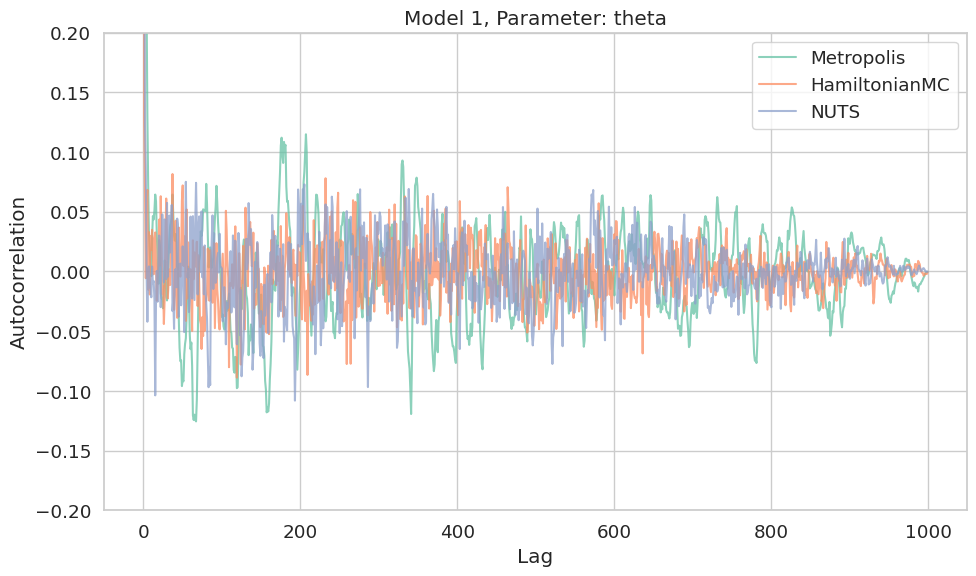

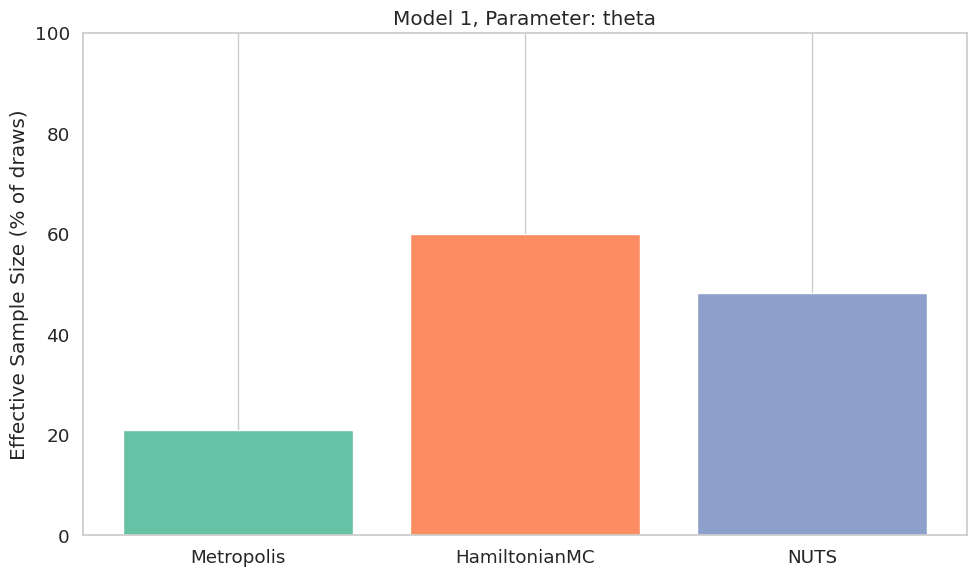

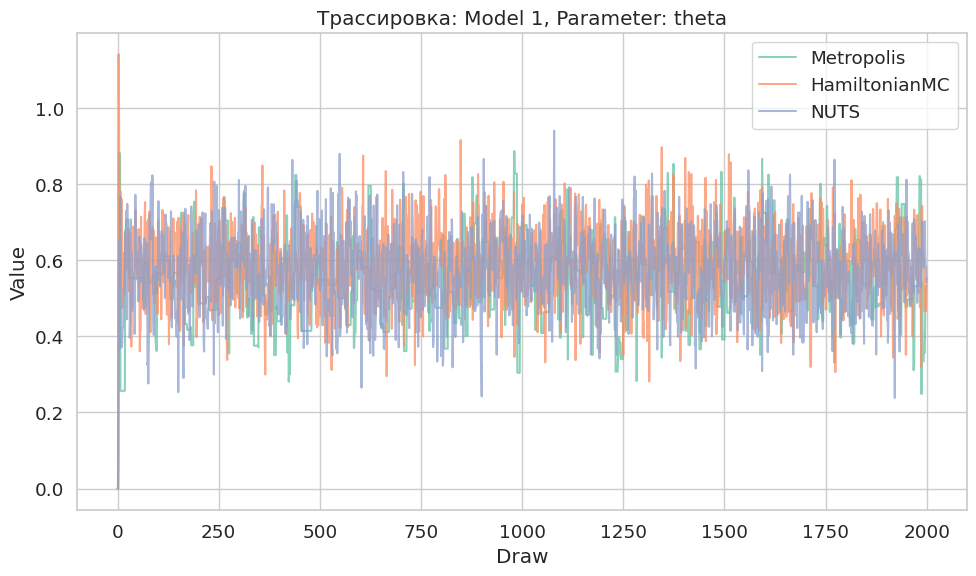

Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [theta_1]
>Metropolis: [theta_2]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
HamiltonianMC: [theta_1, theta_2]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
NUTS: [theta_1, theta_2]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


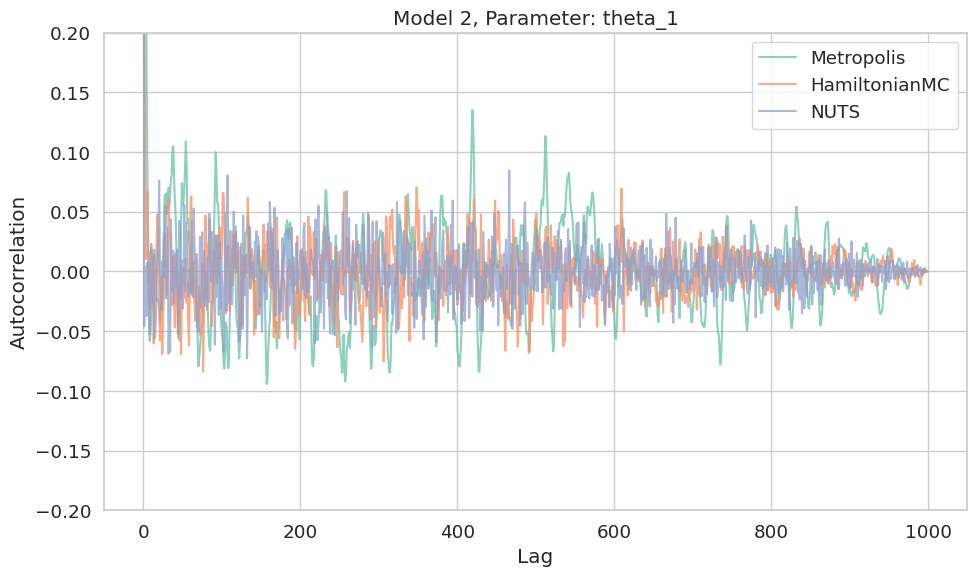

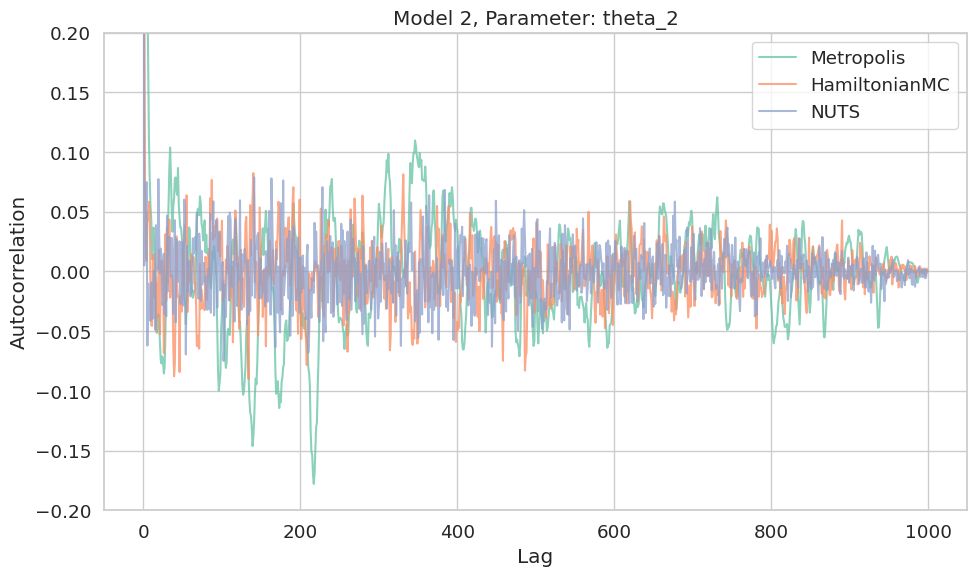

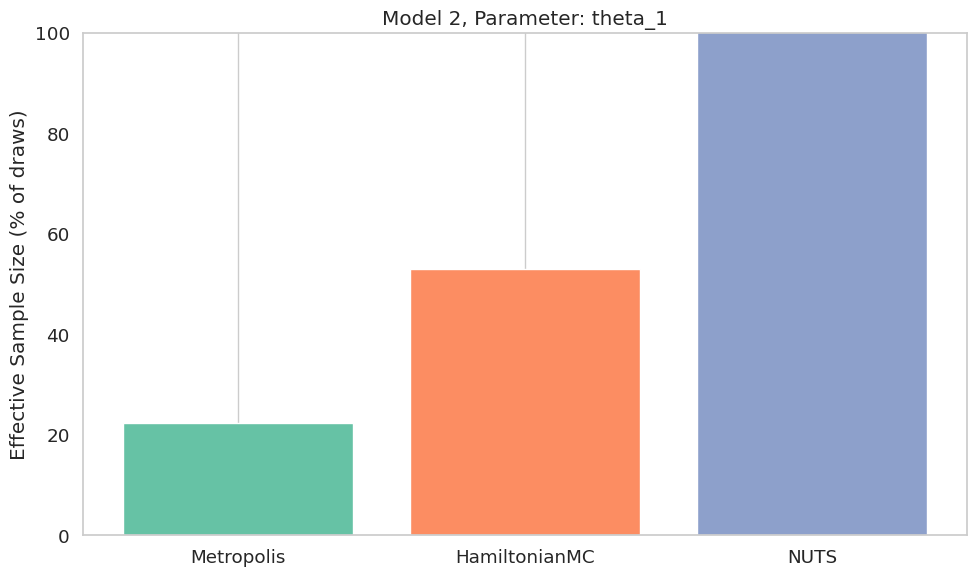

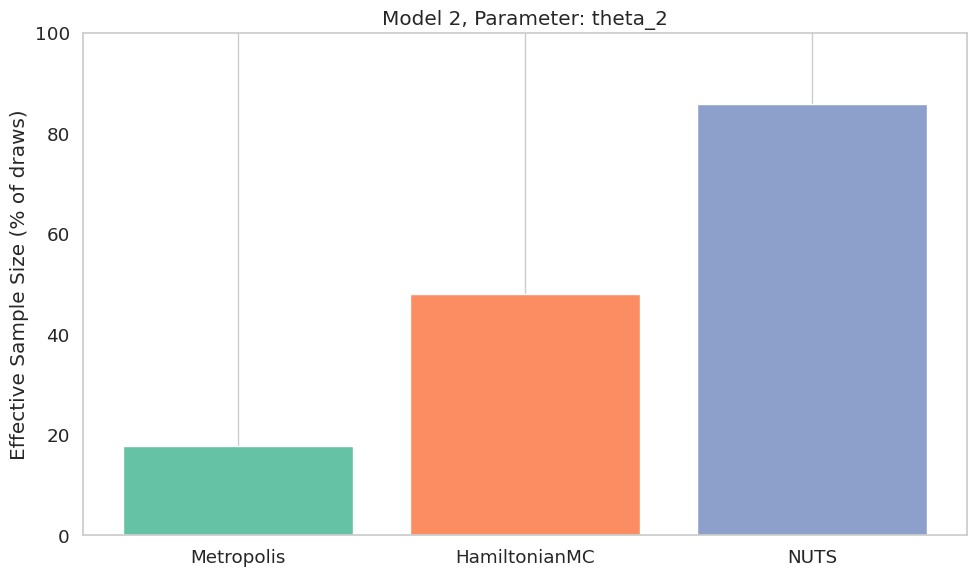

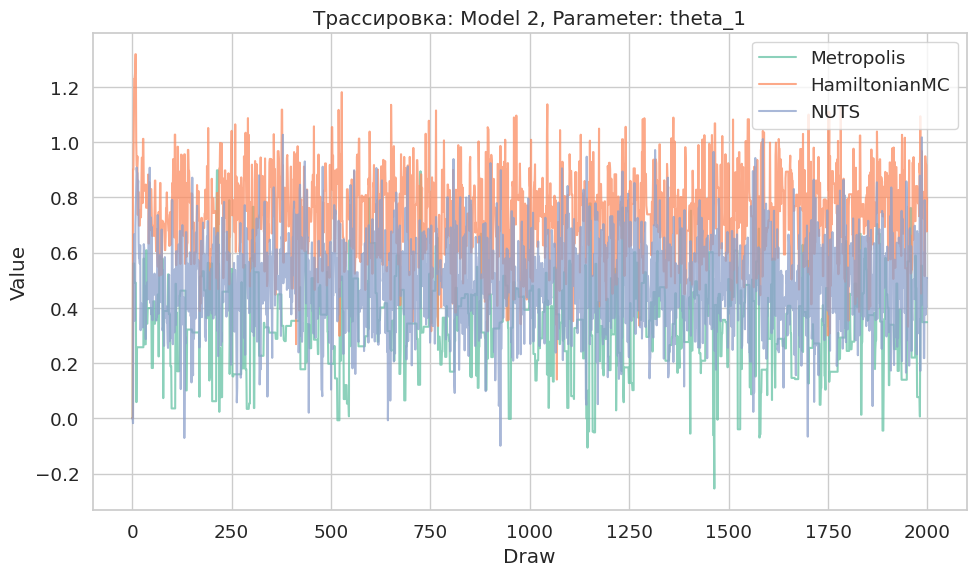

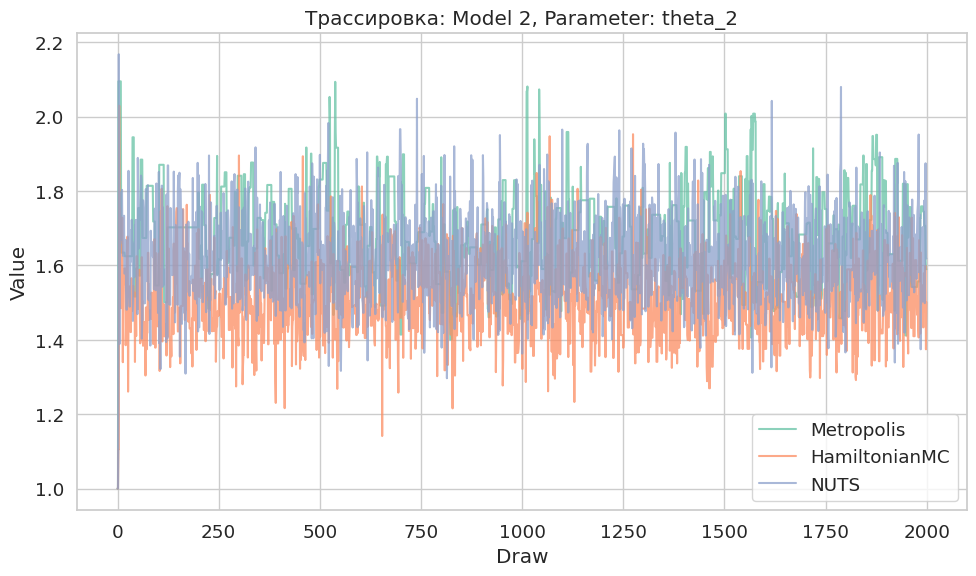

Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [theta_1]
>Metropolis: [theta_2]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
HamiltonianMC: [theta_1, theta_2]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
NUTS: [theta_1, theta_2]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


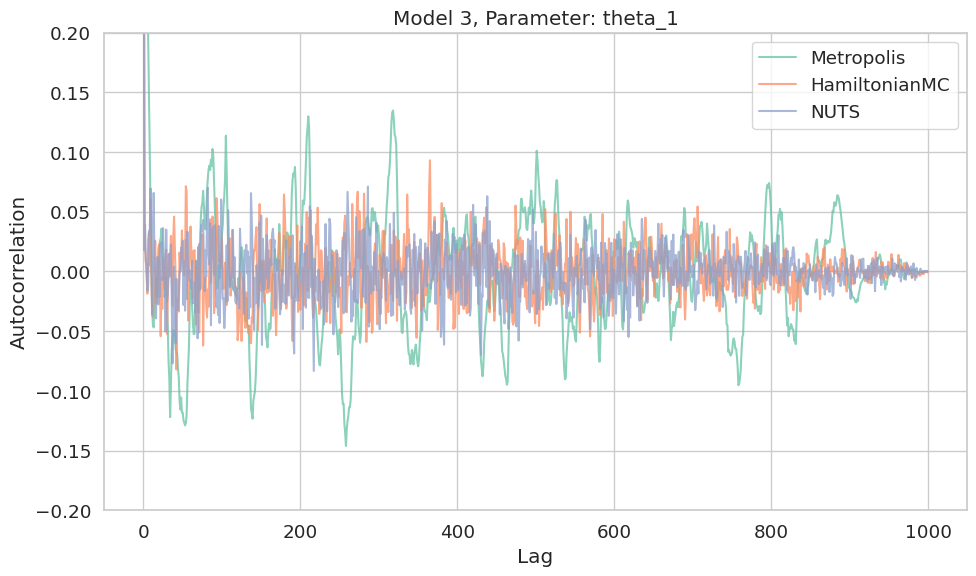

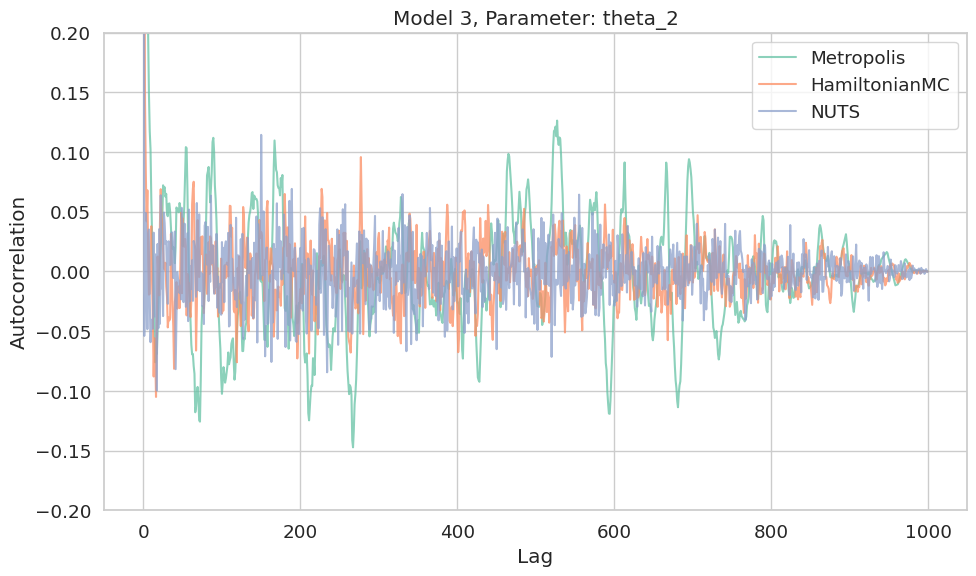

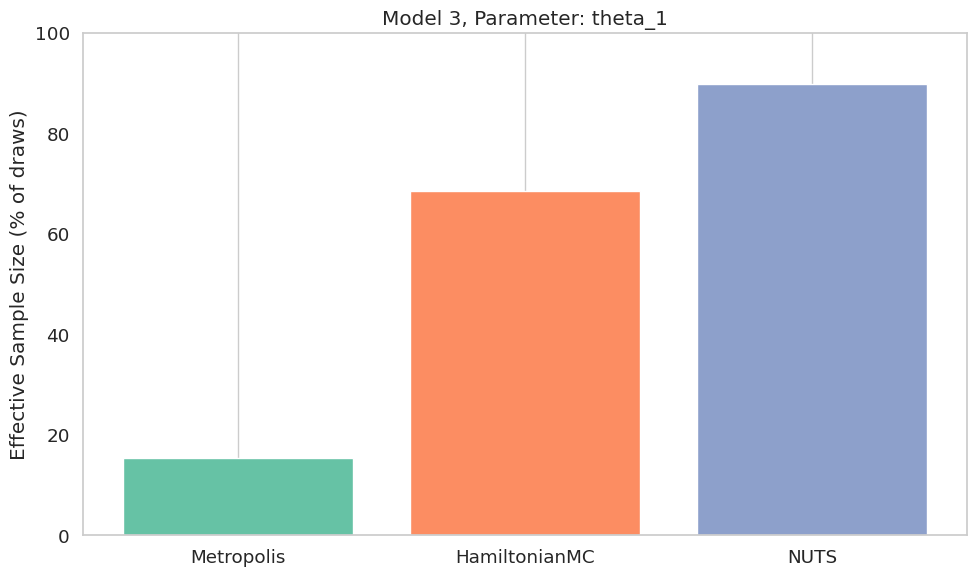

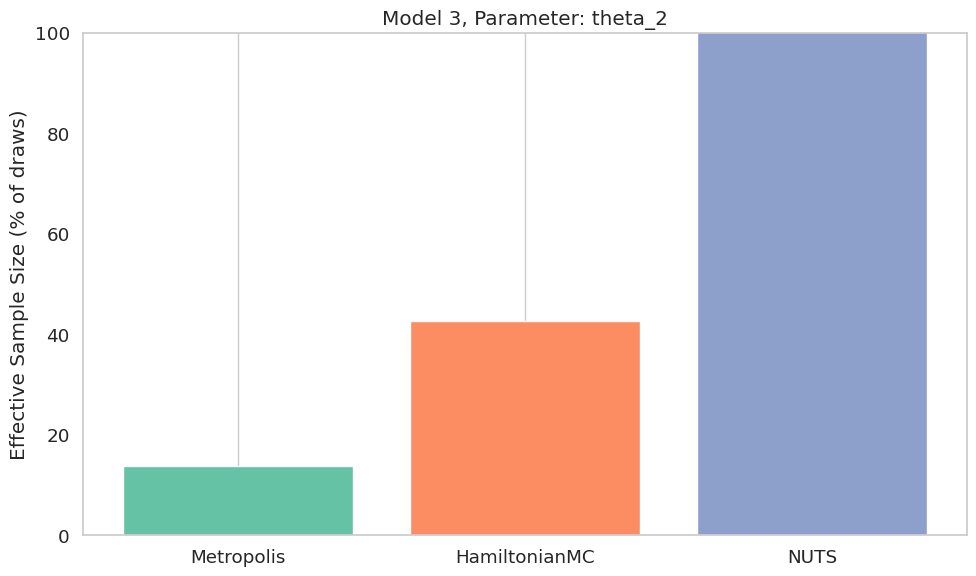

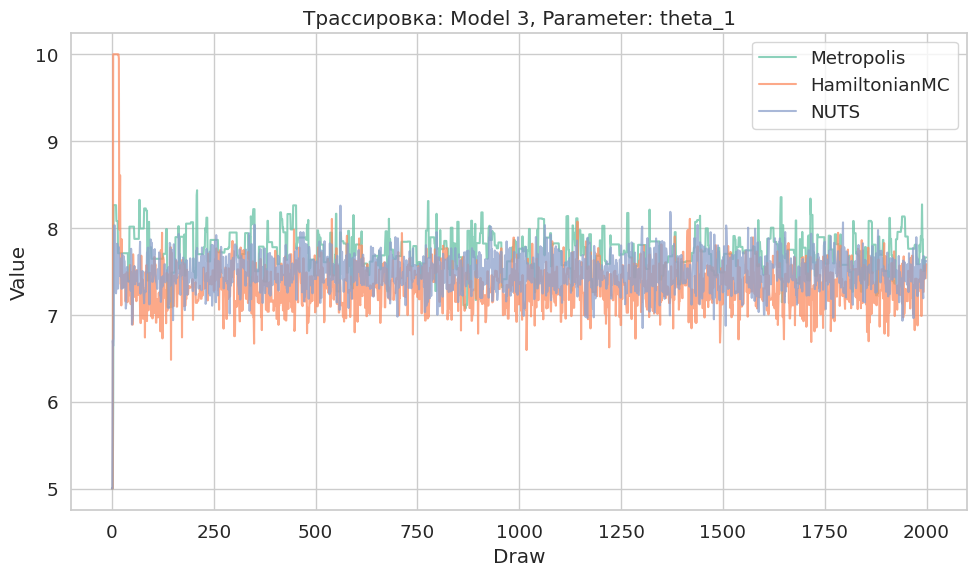

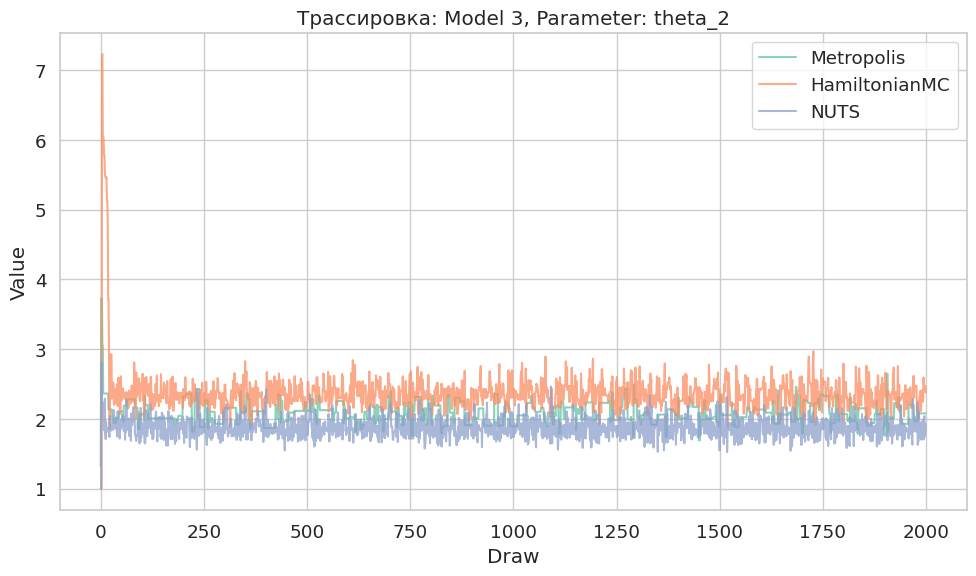

In [117]:
for model_idx in range(1, 4):
    all_traces = []
    for i, sampler in enumerate(samplers):
        observed_data = generate_sample(model_idx)
        model, trace = get_model(model_idx, observed_data, sampler)
        all_traces.append((trace, names[i]))  # Сохраняем trace и название
    
    params = list(all_traces[0][0].posterior.data_vars)  
    # Автокорреляции
    for param in params:
        plt.figure(figsize=(10, 6))
        
        for trace, name in all_traces:
            samples = trace.posterior[param].values.flatten()
            autocorrs = az.autocorr(samples)
            plt.plot(autocorrs, label=name, alpha=0.75)
        
        plt.title(f"Model {model_idx}, Parameter: {param}")
        plt.legend()
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.ylim(-0.2, 0.2)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Эффективный размер выборки
    for param in params:
        plt.figure(figsize=(10, 6))

        for trace, name in all_traces:
            total_samples = trace.posterior.sizes["draw"]
            ess = az.ess(trace, method="bulk")[param].values.item()
            ess_percent = 100 * ess / total_samples
            plt.bar(name, ess_percent)

        plt.title(f"Model {model_idx}, Parameter: {param}")
        plt.ylabel('Effective Sample Size (% of draws)')
        plt.ylim(0, 100)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    # Трассировка
    for param in params:
        plt.figure(figsize=(10, 6))
        
        for trace, name in all_traces:
            warmup_samples = trace.warmup_posterior[param].values.flatten()  
            posterior_samples = trace.posterior[param].values.flatten()
            samples = np.concatenate([warmup_samples, posterior_samples])
            plt.plot(samples, label=name, alpha=0.75)
        plt.legend()
        plt.title(f"Трассировка: Model {model_idx}, Parameter: {param}")
        plt.xlabel('Draw')
        plt.ylabel('Value')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
            
        

Проделаем дополнительный анализ для первой модели

In [ ]:
all_traces = []
for i, sampler in enumerate(samplers):
    observed_data = generate_sample(1)
    model, trace = get_model(1, observed_data, sampler)
    all_traces.append((trace, names[i]))

True posterior mean: 0.4956, std: 0.0995


Sequential sampling (1 chains in 1 job)
Metropolis: [theta]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
HamiltonianMC: [theta]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
NUTS: [theta]
Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


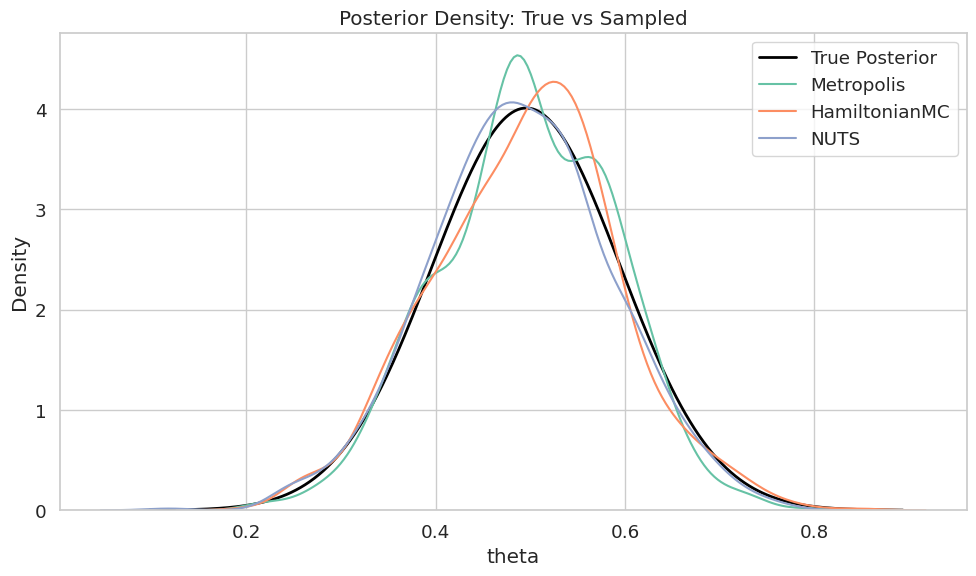

In [119]:
observed_data = generate_sample(1)
n = len(observed_data)
x_bar = np.mean(observed_data)

sigma2 = 1
tau2 = 1
mu0 = 0

tau_n2 = 1 / (n / sigma2 + 1 / tau2)
mu_n = tau_n2 * (n * x_bar / sigma2 + mu0 / tau2)
std_n = np.sqrt(tau_n2)

print(f"True posterior mean: {mu_n:.4f}, std: {std_n:.4f}")

all_traces = []
for i, sampler in enumerate(samplers):
    model, trace = get_model(1, observed_data, sampler)
    all_traces.append((trace, names[i]))

x_vals = np.linspace(mu_n - 4*std_n, mu_n + 4*std_n, 500)
true_pdf = sps.norm.pdf(x_vals, loc=mu_n, scale=std_n)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, true_pdf, label="True Posterior", lw=2, color='black')

for trace, name in all_traces:
    samples = trace.posterior["theta"].values.squeeze()
    sns.kdeplot(samples, label=name)

plt.title("Posterior Density: True vs Sampled")
plt.xlabel("theta")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [122]:
print(f"\nTrue mean: {mu_n:.4f}, True variance: {tau_n2:.4f}\n")

for trace, name in all_traces:
    samples = trace.posterior["theta"].values.squeeze()
    mean = samples.mean()
    var = samples.var()
    print(f"{name} — Mean: {mean:.4f}, Variance: {var:.4f}")


True mean: 0.4956, True variance: 0.0099

Metropolis — Mean: 0.4966, Variance: 0.0083
HamiltonianMC — Mean: 0.4954, Variance: 0.0095
NUTS — Mean: 0.4895, Variance: 0.0091


Сделайте выводы

Наихудшим оказался Метрополис, он имеет большие автокорреляции и низкий эффективный размер выборки. 

Гамильтонова динамика оказалась чуть хуже NUTS, так имеет меньший эффективный размер выборки, но сопоставимые корреляции.

По анализу первой модели видно, что NUTS в среднем лучше справляется с задачей сэмплирования.

__________________
### Задача 3

Исследуем, как методы MCMC работают с многомодальными распределениями. Типичный пример многомодального распределения &mdash; смесь распределений. В частности, на смеси распределений основан метод k-means.

Рассмотрим смесь трех одномерных нормальных распределений. Выборку можно сгенерировать следующим способом

In [123]:
X, _ = make_blobs(n_samples=300, n_features=1, centers=[[-7], [0], [15]])

Допишите заданную ниже модель, указав параметры распределений и семплирования

In [ ]:
def model_mixture(X, sampler, chains=1):
    with pm.Model() as model:
        # априорное распределение параметров компонент
        theta_1 = pm.Normal("theta_1", mu=0, sigma=1)
        theta_2 = pm.Normal("theta_2", mu=0, sigma=1)
        theta_3 = pm.Normal("theta_3", mu=0, sigma=1)

        # априорное распределение вероятностей компонент
        pi = pm.Dirichlet("pi", a=np.ones(3))

        # распределения компонент
        comp1 = pm.Normal.dist(mu=theta_1)
        comp2 = pm.Normal.dist(mu=theta_2)
        comp3 = pm.Normal.dist(mu=theta_3)

        # сама смесь
        mix = pm.Mixture(
            "mix", w=pi, comp_dists=[comp1, comp2, comp3], observed=X.ravel()
        )

        trace = pm.sample(
            2000,
            chains=chains,
            step=sampler(),
            discard_tuned_samples=False,
            progressbar=False,
        )

    return model, trace

Исследуйте, как зависит апостериорное распределение компонент $\theta$ в зависимости от метода семплирования и количества цепей (от 1 до 4).

Используйте функцию `pm.plot_posterior` для визуализации апостериорного распределения и `pm.plot_trace` для визуализации результатов в разрезе каждой цепи.

Metropolis, chains=1


Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [theta_1]
>Metropolis: [theta_2]
>Metropolis: [theta_3]
>Metropolis: [pi]
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


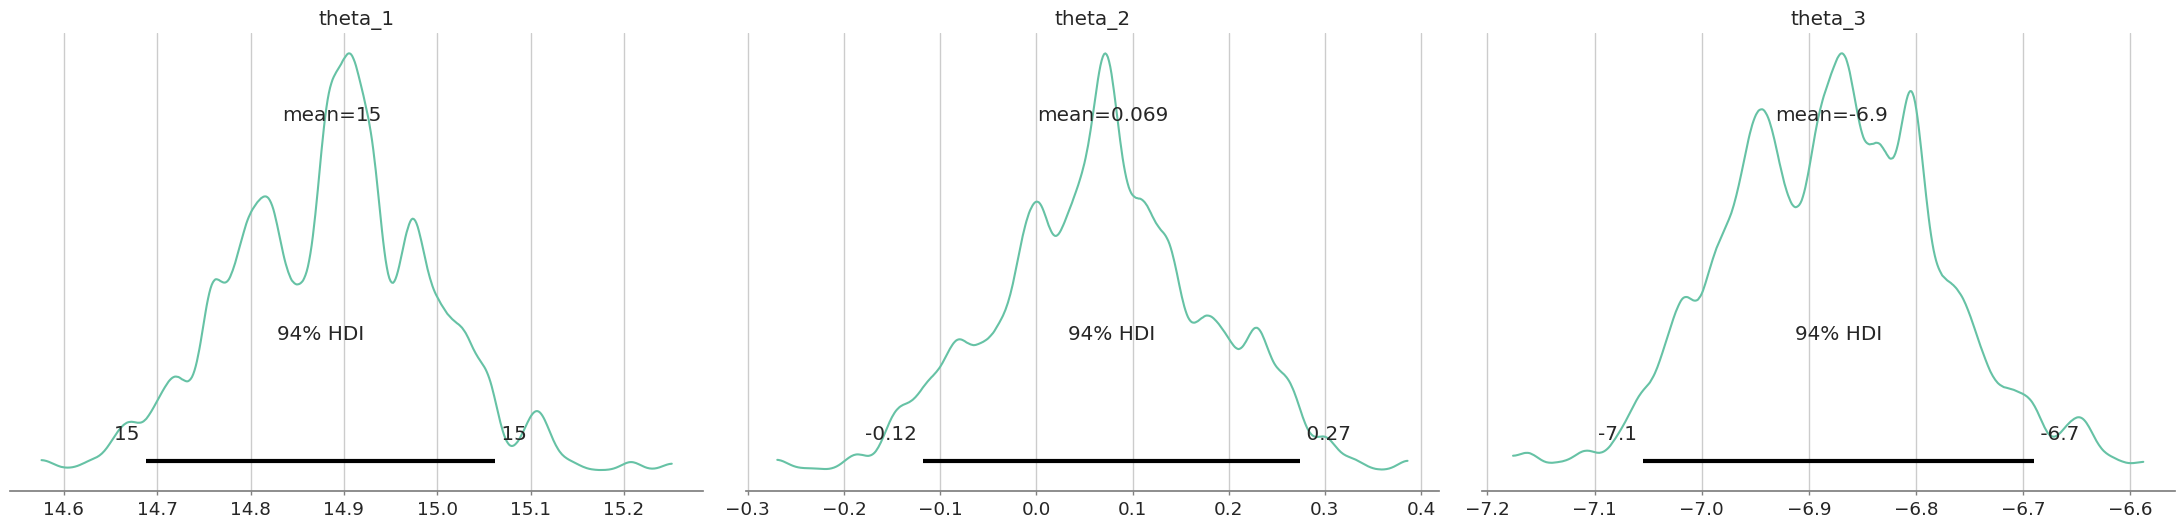

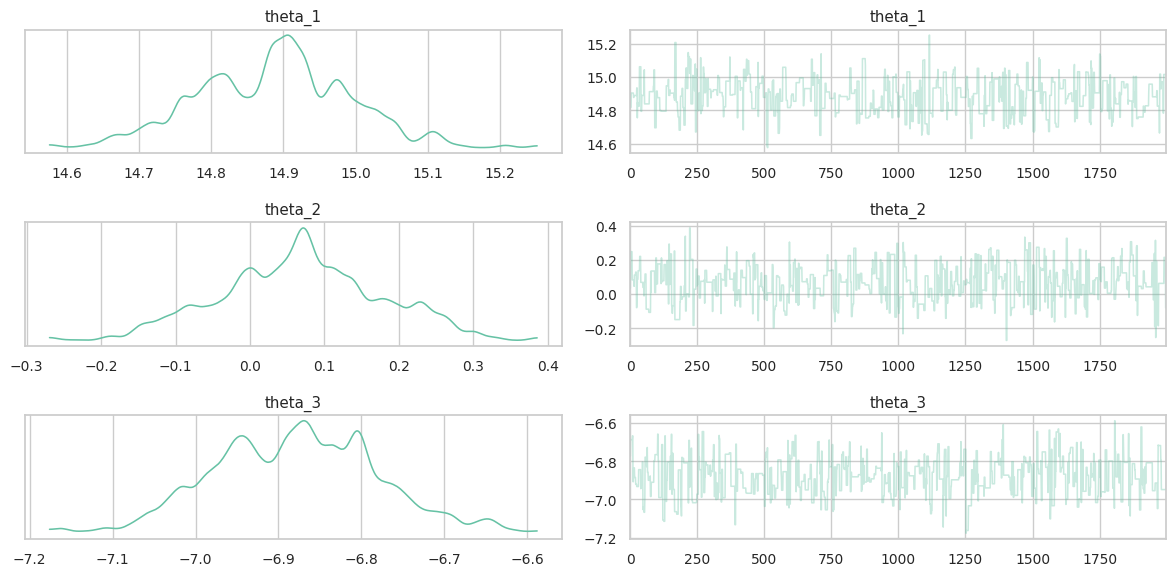

Metropolis, chains=2


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [theta_1]
>Metropolis: [theta_2]
>Metropolis: [theta_3]
>Metropolis: [pi]
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. S

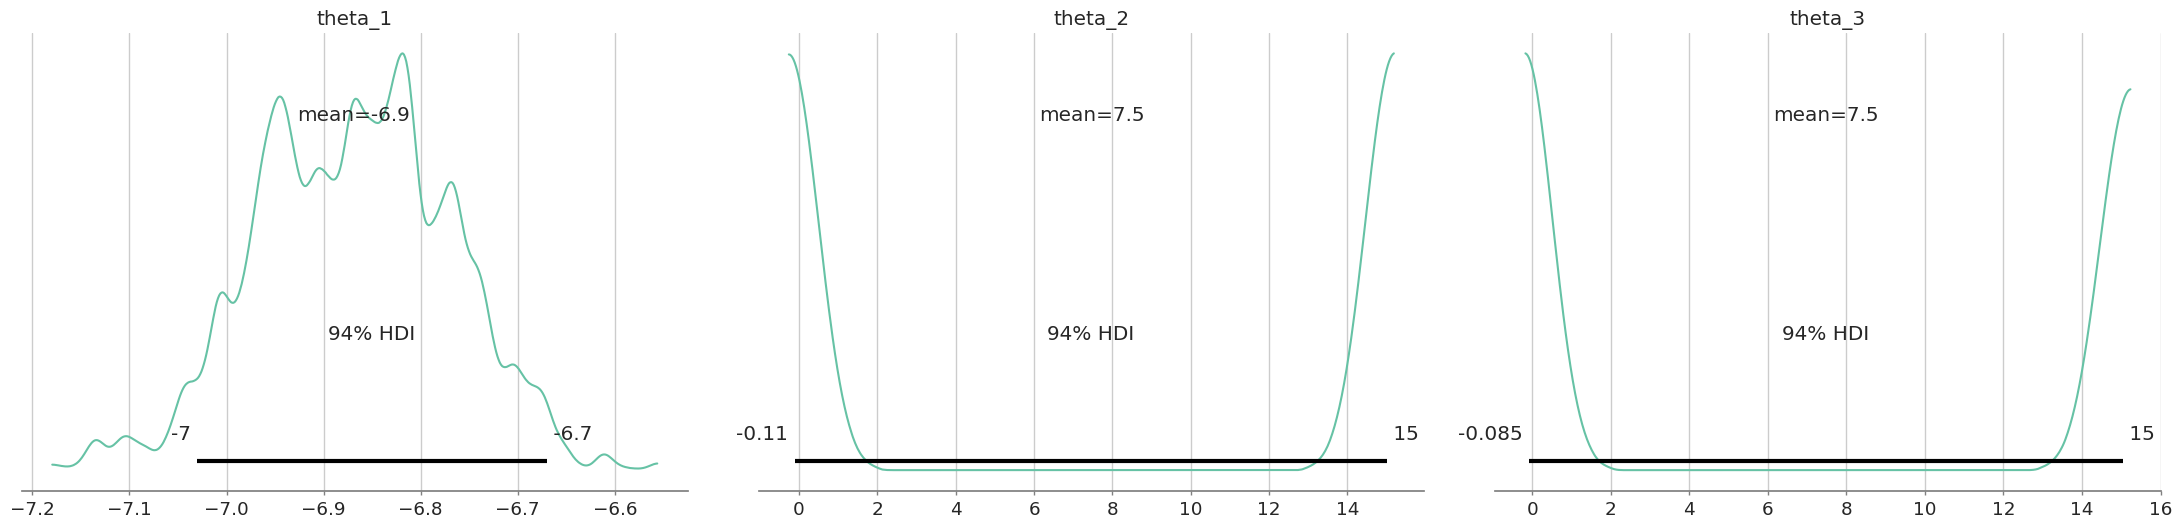

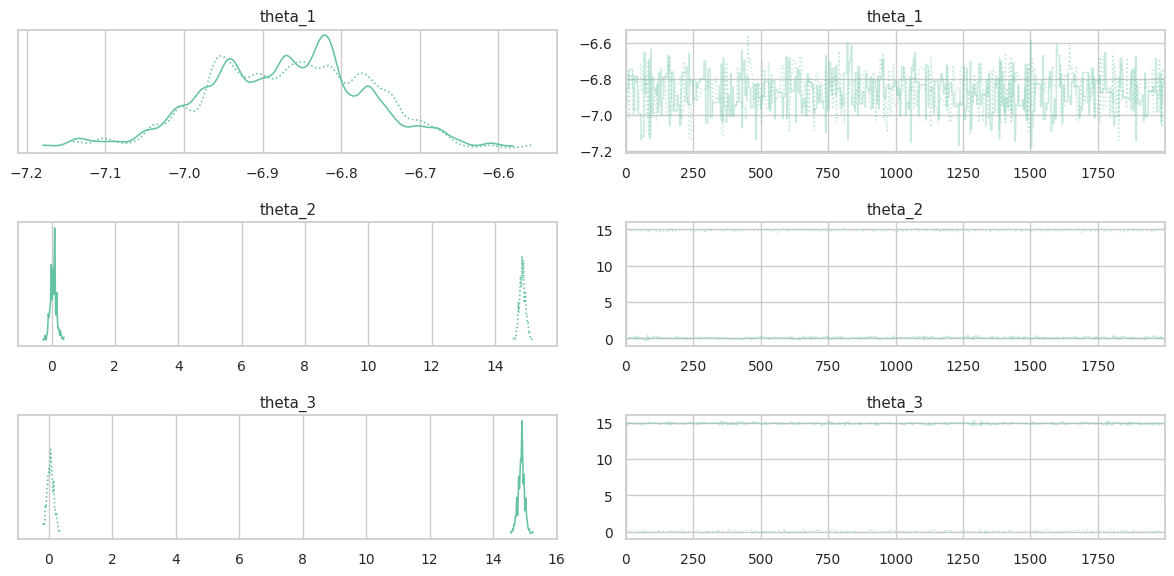

Metropolis, chains=3


Multiprocess sampling (3 chains in 2 jobs)
CompoundStep
>Metropolis: [theta_1]
>Metropolis: [theta_2]
>Metropolis: [theta_3]
>Metropolis: [pi]
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
Sampling 3 chains for 1_000 tune and 2_000 draw iterations (3_000 + 6_000 draws total) took 15 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See http

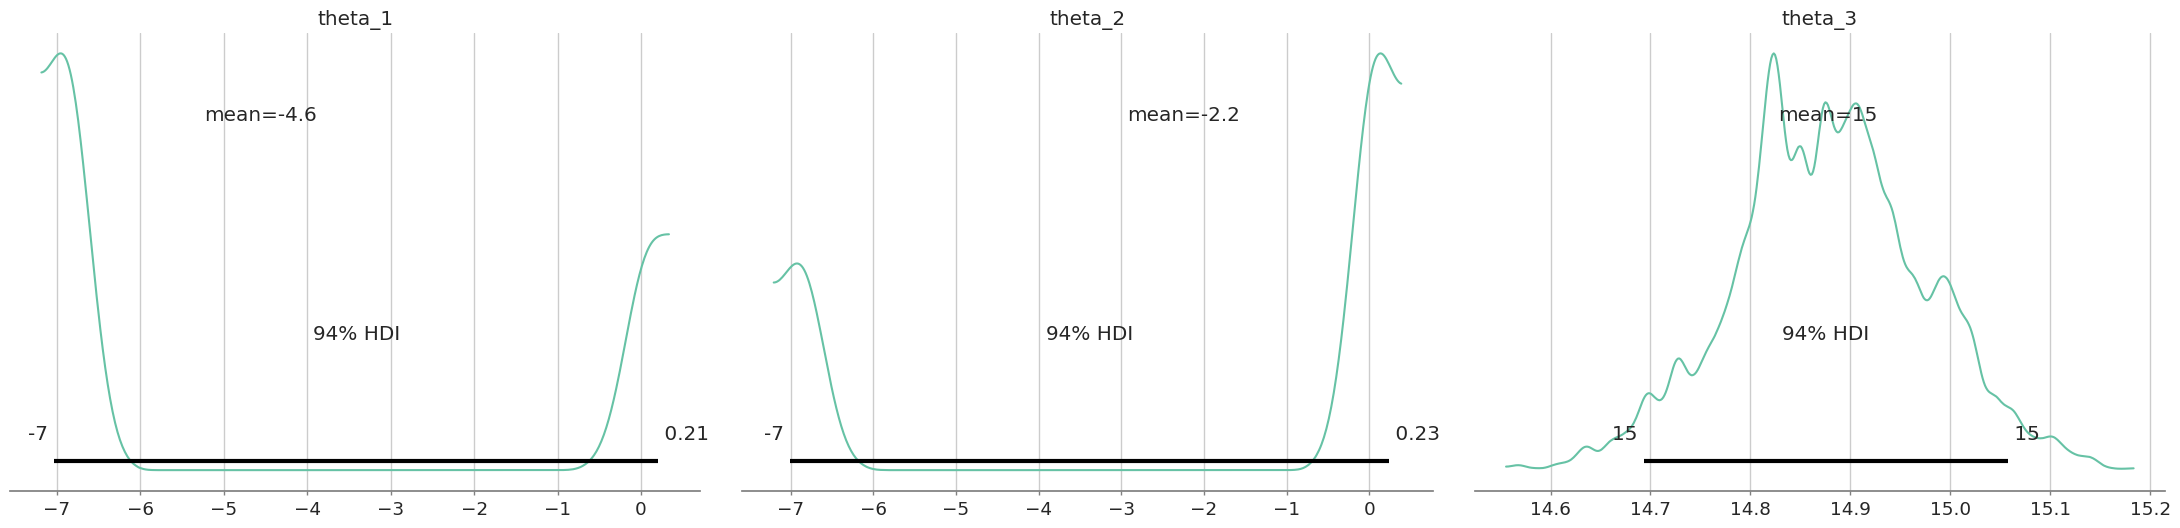

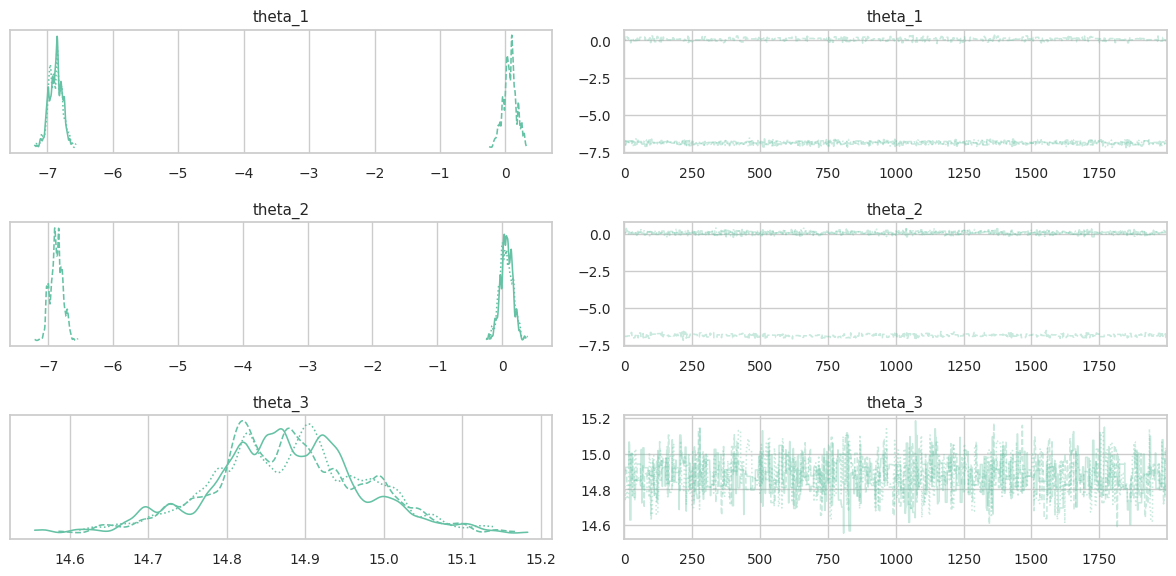

HamiltonianMC, chains=1


Sequential sampling (1 chains in 1 job)
HamiltonianMC: [theta_1, theta_2, theta_3, pi]
Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 4 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


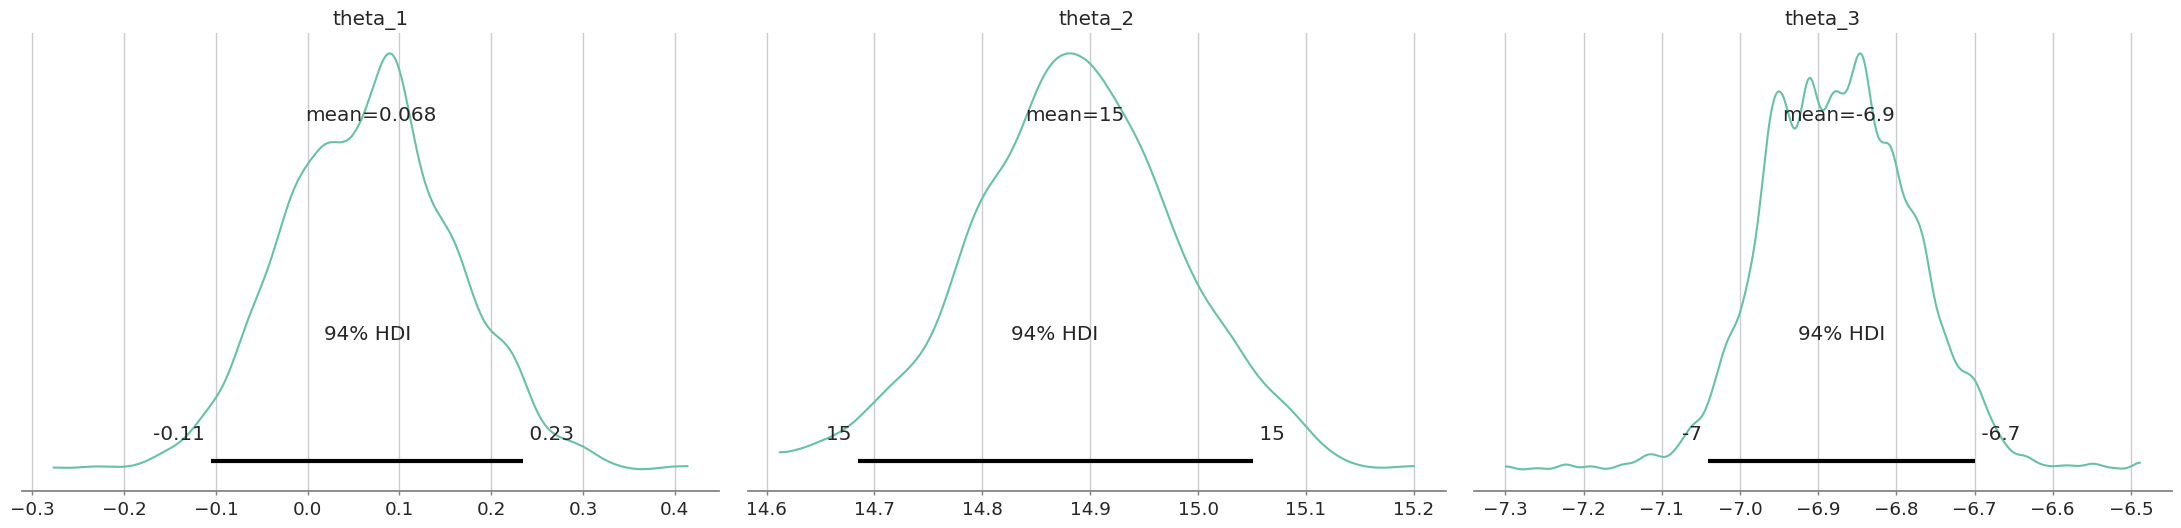

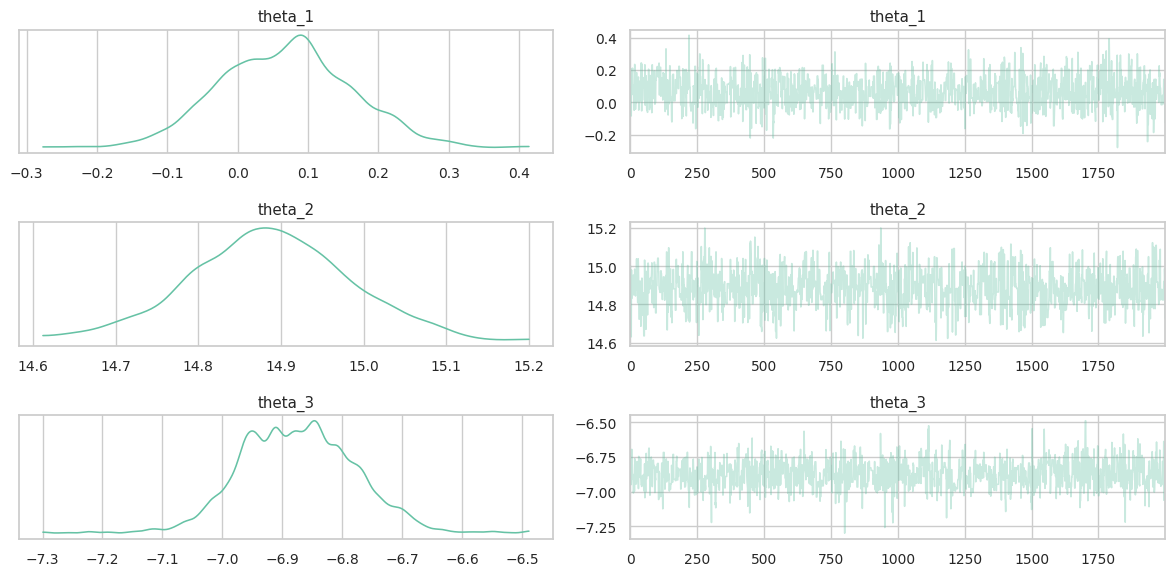

HamiltonianMC, chains=2


Multiprocess sampling (2 chains in 2 jobs)
HamiltonianMC: [theta_1, theta_2, theta_3, pi]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


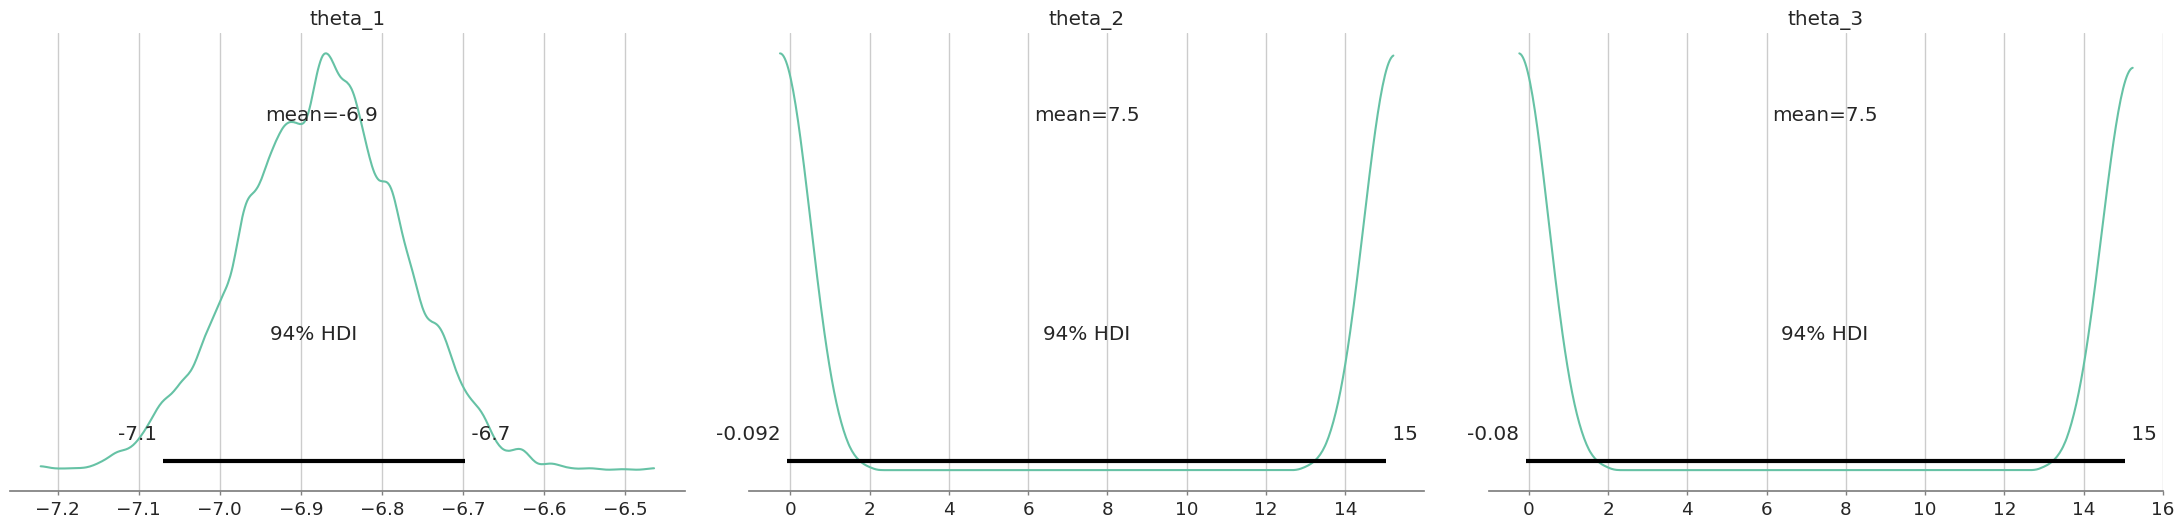

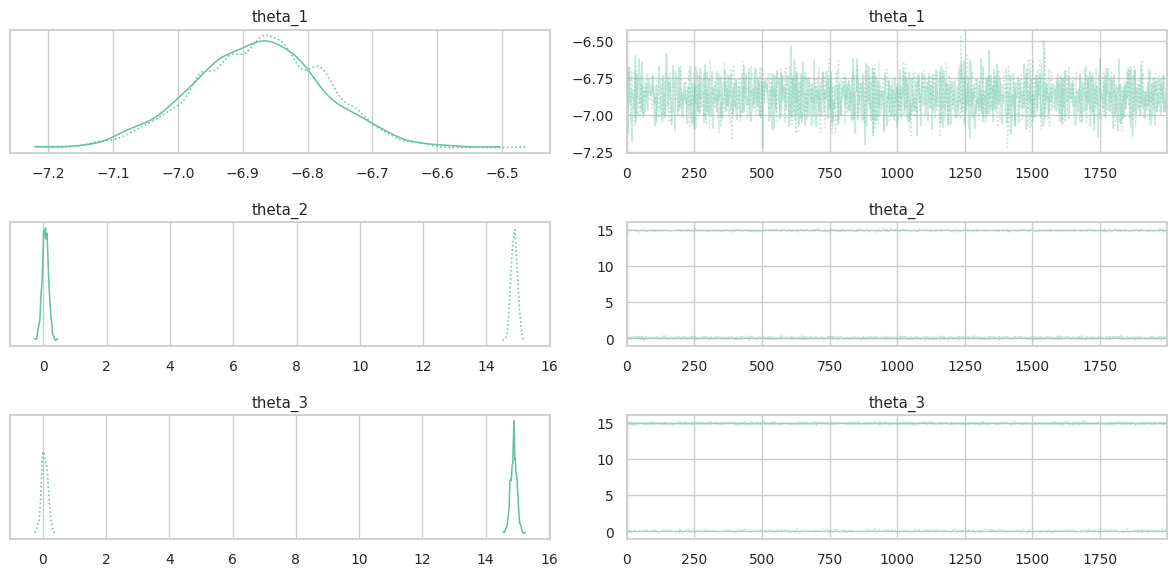

HamiltonianMC, chains=3


Multiprocess sampling (3 chains in 2 jobs)
HamiltonianMC: [theta_1, theta_2, theta_3, pi]
Sampling 3 chains for 1_000 tune and 2_000 draw iterations (3_000 + 6_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


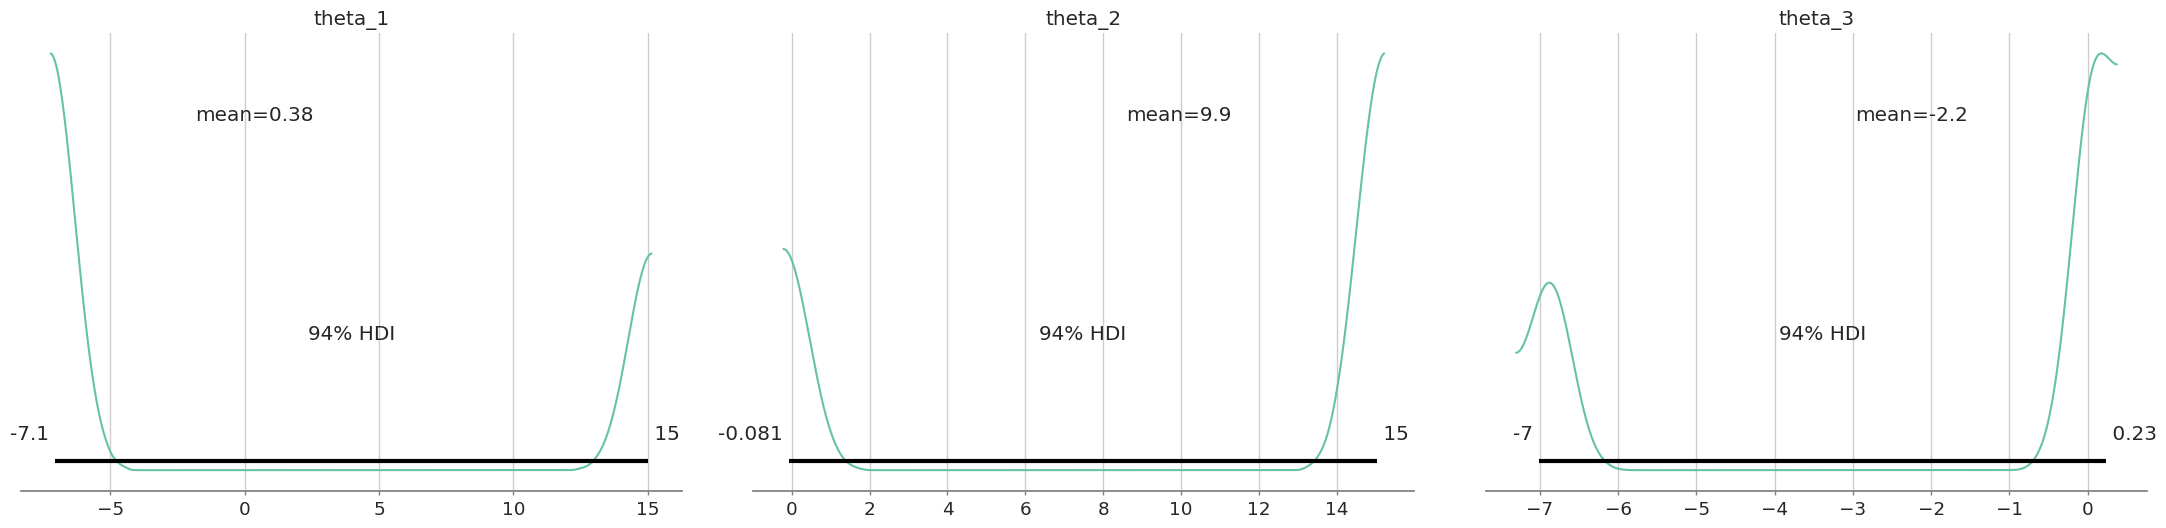

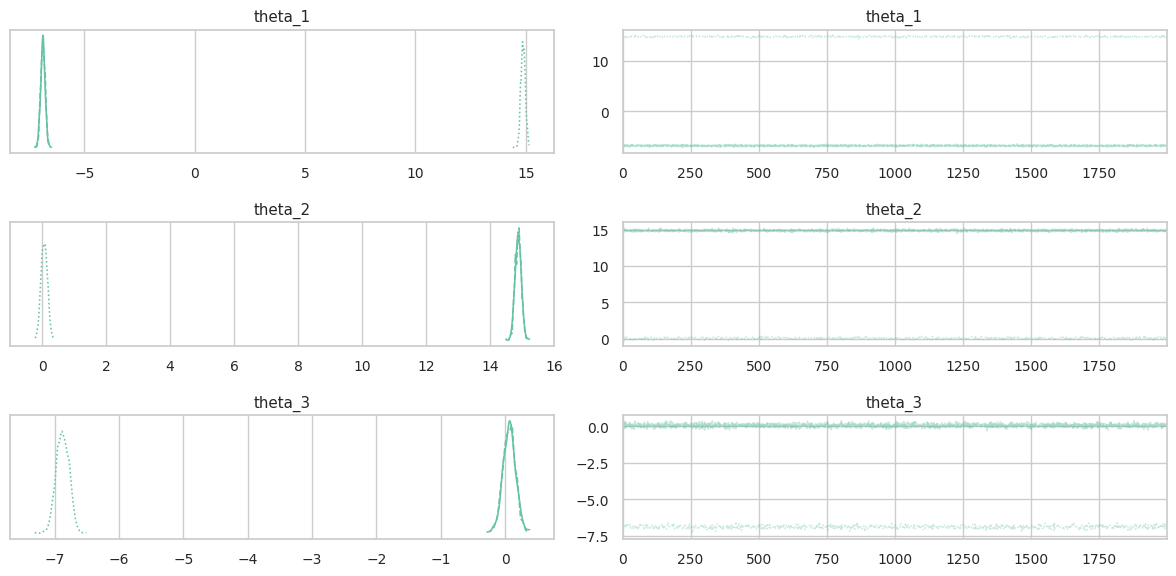

NUTS, chains=1


Sequential sampling (1 chains in 1 job)
NUTS: [theta_1, theta_2, theta_3, pi]
Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


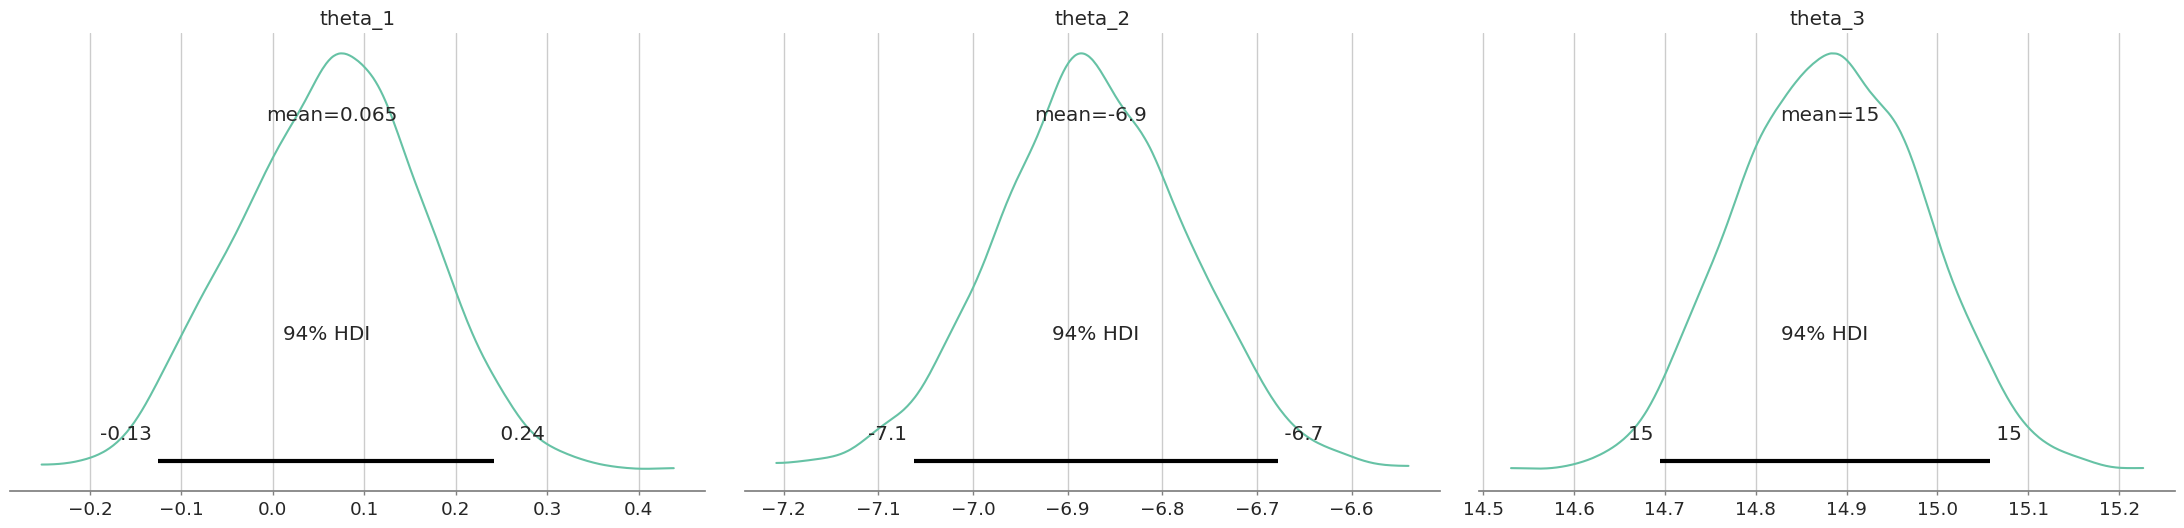

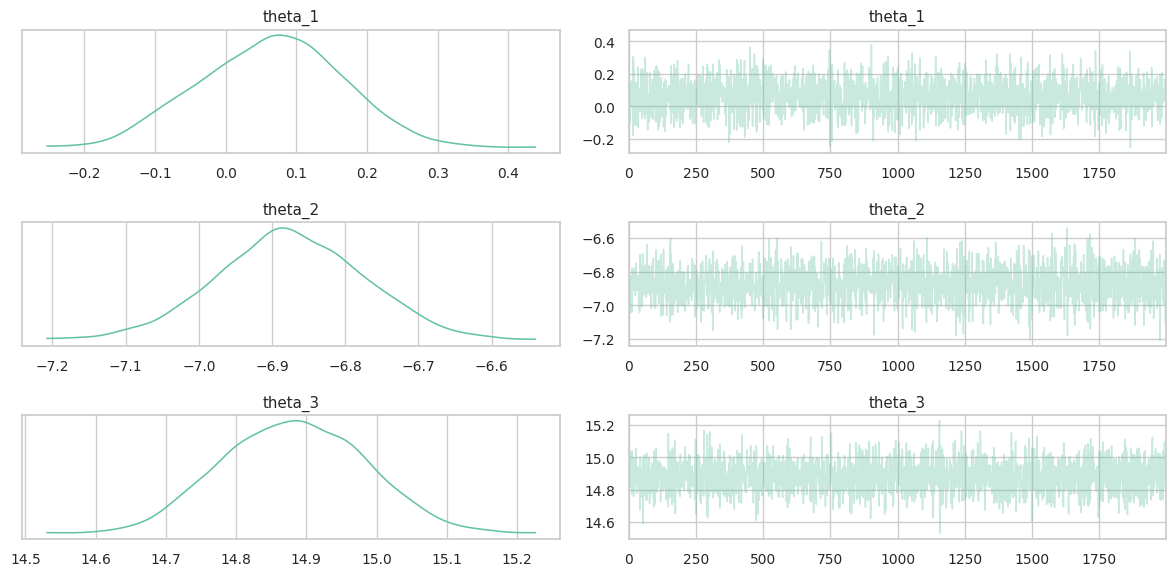

NUTS, chains=2


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta_1, theta_2, theta_3, pi]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


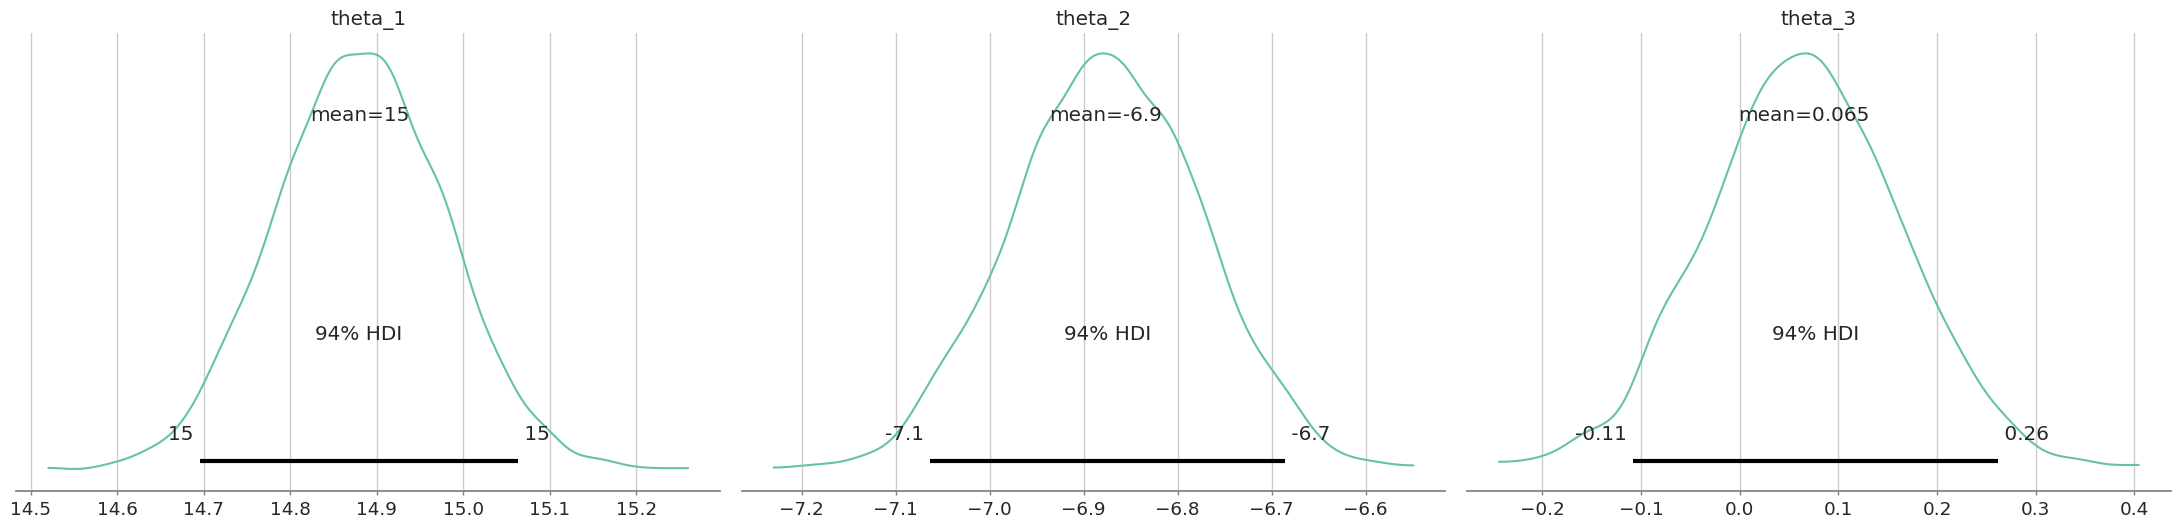

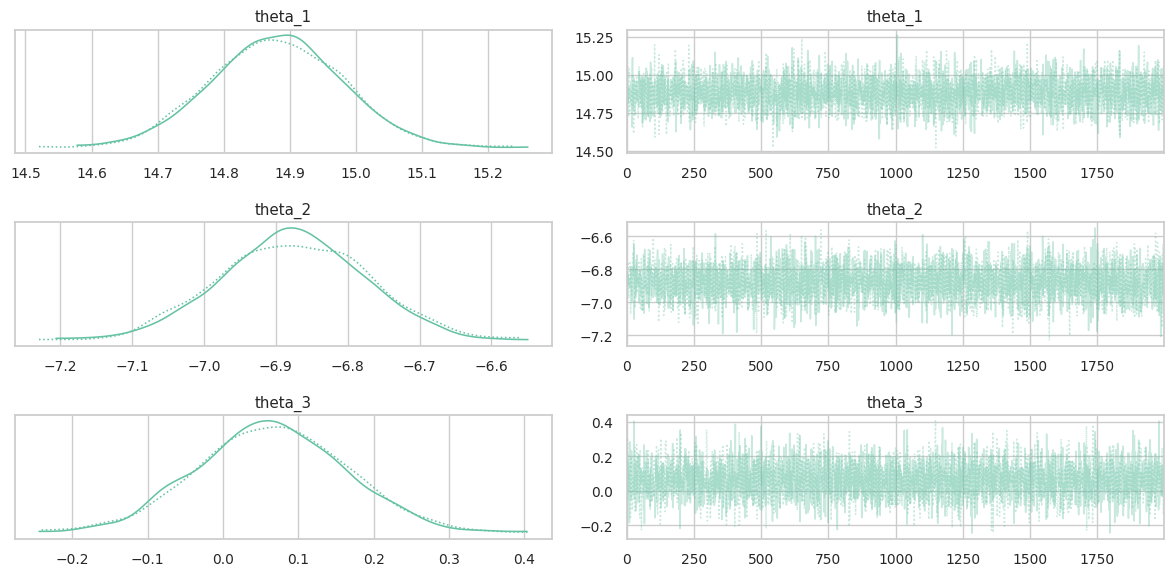

NUTS, chains=3


Multiprocess sampling (3 chains in 2 jobs)
NUTS: [theta_1, theta_2, theta_3, pi]
Sampling 3 chains for 1_000 tune and 2_000 draw iterations (3_000 + 6_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


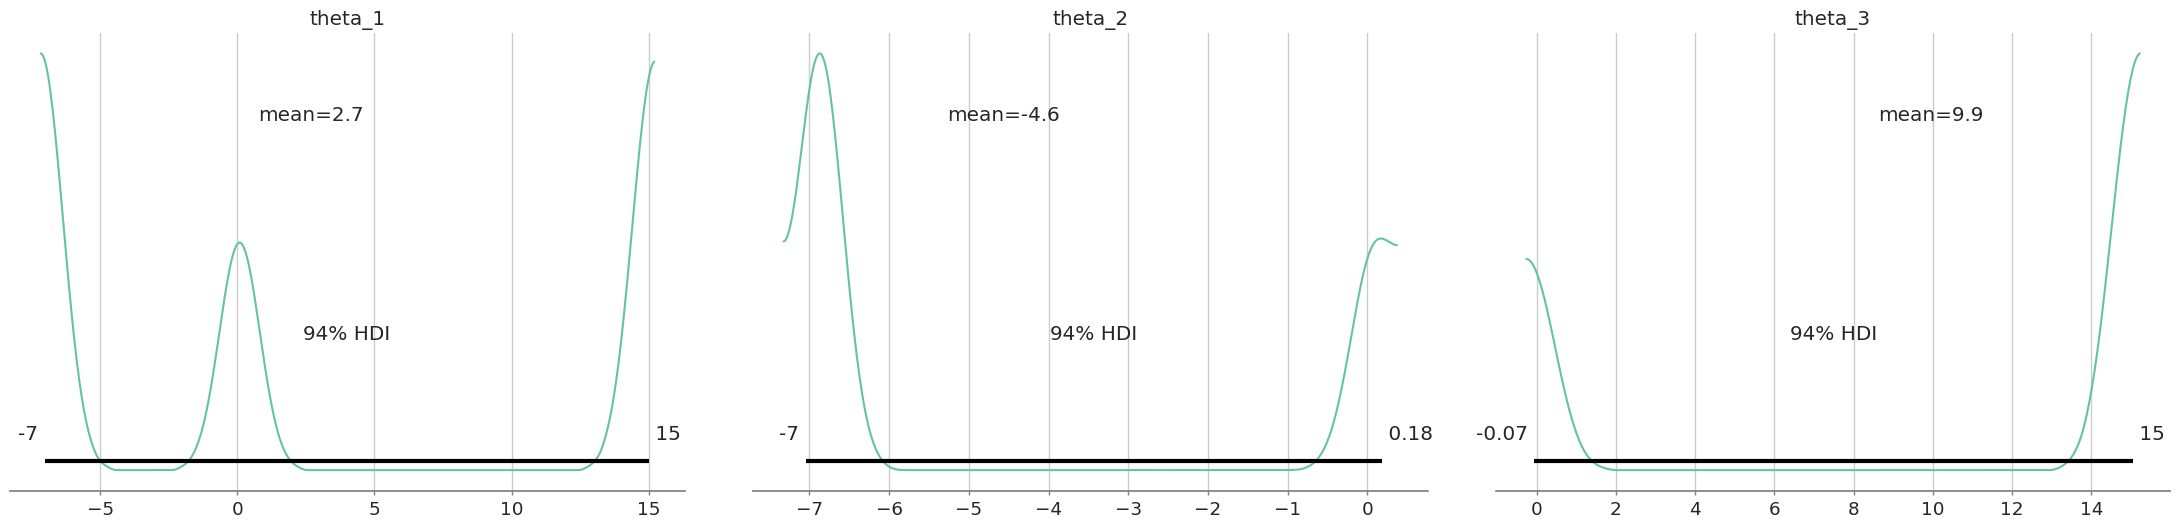

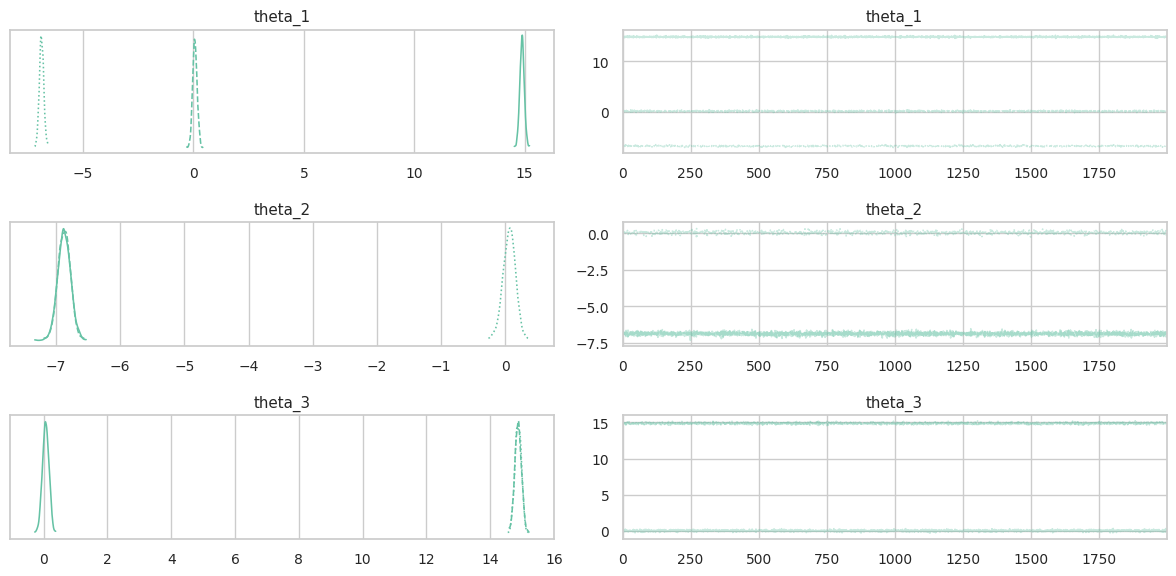

In [141]:
for name, sampler in zip(names, samplers):
    for chains in range(1, 4):
        print("=" * 100)
        print(f"{name}, chains={chains}")
        model, trace = model_mixture(X, sampler, chains)
        pm.plot_posterior(trace, var_names=["theta_1", "theta_2", "theta_3"])
        plt.tight_layout()
        plt.show()
        
        pm.plot_trace(trace, var_names=["theta_1", "theta_2", "theta_3"])
        plt.tight_layout()
        plt.show()
        

Можно ли как-то исправить возникающий эффект при использовании нескольких цепей?

Да, достаточно задать разные апрорные распределения для параметров компонент. Это связано с тем, что их апостериорные распрделения будут несопоставимы.

In [148]:
def model_mixture_fixed(X, sampler, chains=1):
    with pm.Model() as model:
        # априорное распределение параметров компонент
        theta_1 = pm.Normal("theta_1", mu=5, sigma=16)
        theta_2 = pm.Normal("theta_2", mu=0, sigma=32)
        theta_3 = pm.Normal("theta_3", mu=-5, sigma=64)

        # априорное распределение вероятностей компонент
        pi = pm.Dirichlet("pi", a=np.ones(3))

        # распределения компонент
        comp1 = pm.Normal.dist(mu=theta_1)
        comp2 = pm.Normal.dist(mu=theta_2)
        comp3 = pm.Normal.dist(mu=theta_3)

        # сама смесь
        mix = pm.Mixture(
            "mix", w=pi, comp_dists=[comp1, comp2, comp3], observed=X.ravel()
        )

        trace = pm.sample(
            2000,
            chains=chains,
            step=sampler(),
            discard_tuned_samples=False,
            progressbar=False,
        )

    return model, trace

Metropolis, chains=1


Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [theta_1]
>Metropolis: [theta_2]
>Metropolis: [theta_3]
>Metropolis: [pi]
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


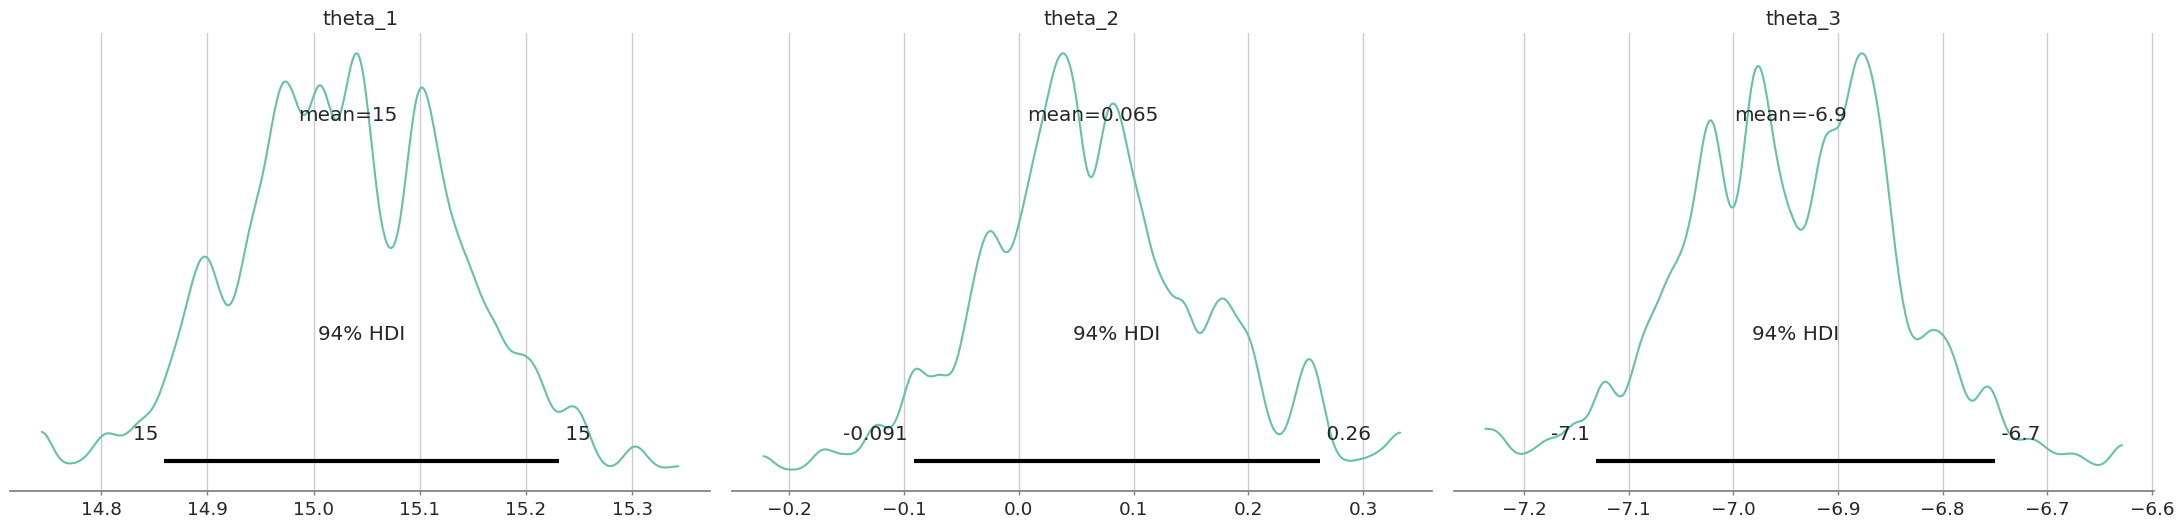

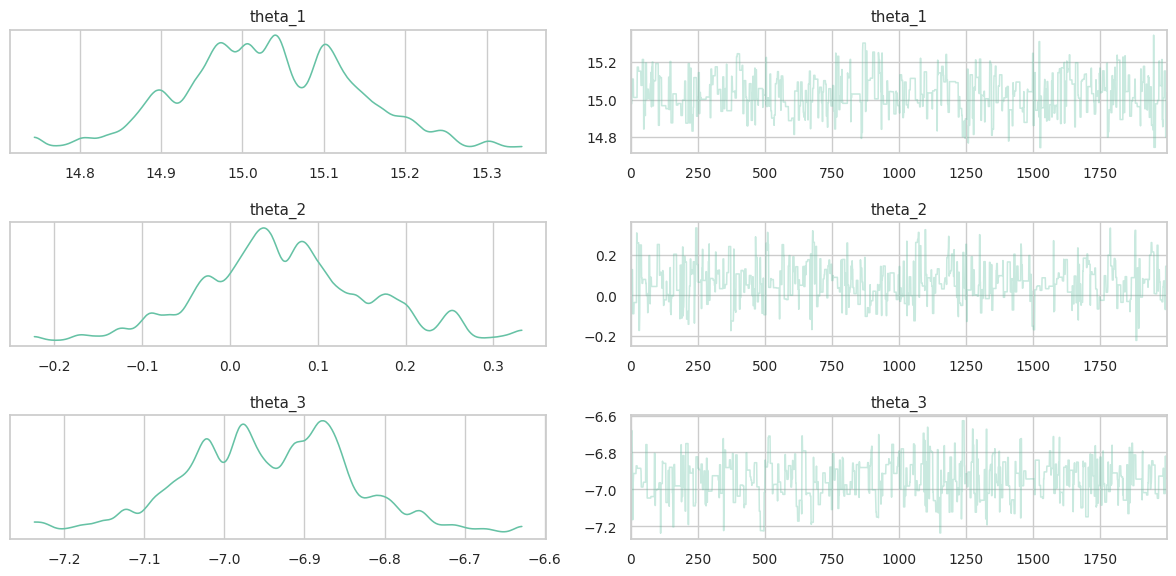

Metropolis, chains=2


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [theta_1]
>Metropolis: [theta_2]
>Metropolis: [theta_3]
>Metropolis: [pi]
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


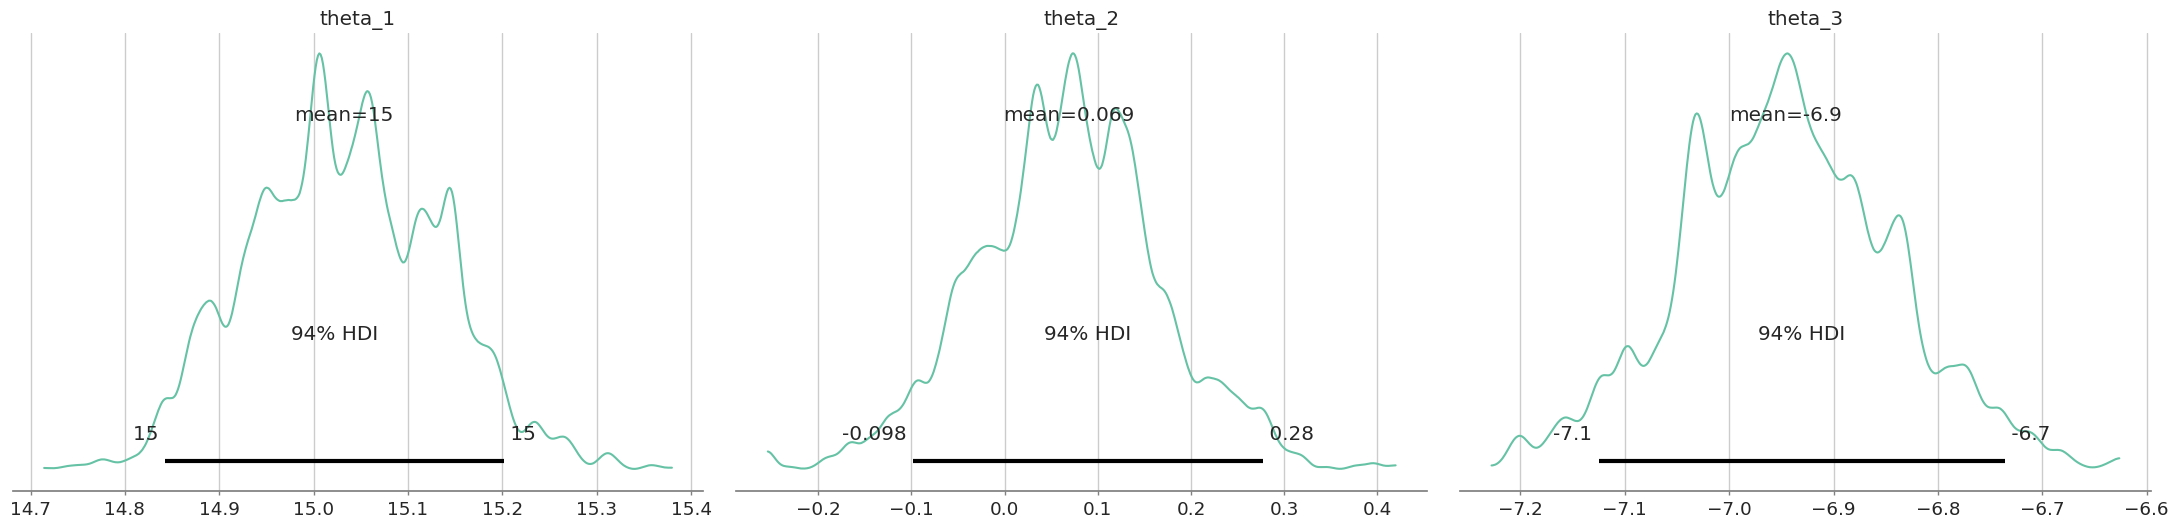

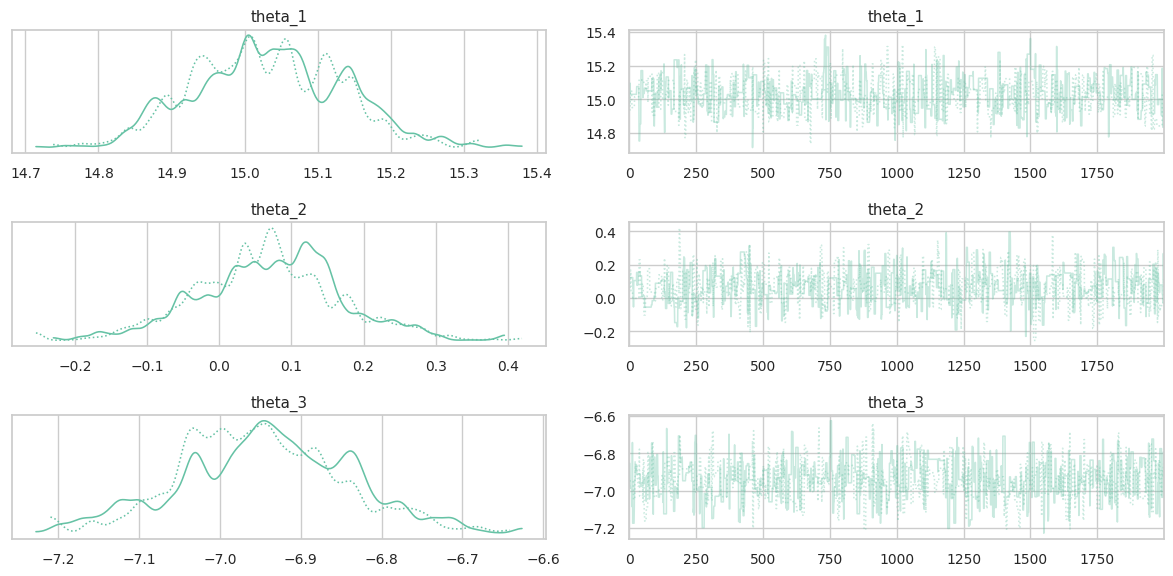

Metropolis, chains=3


Multiprocess sampling (3 chains in 2 jobs)
CompoundStep
>Metropolis: [theta_1]
>Metropolis: [theta_2]
>Metropolis: [theta_3]
>Metropolis: [pi]
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
Sampling 3 chains for 1_000 tune and 2_000 draw iterations (3_000 + 6_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


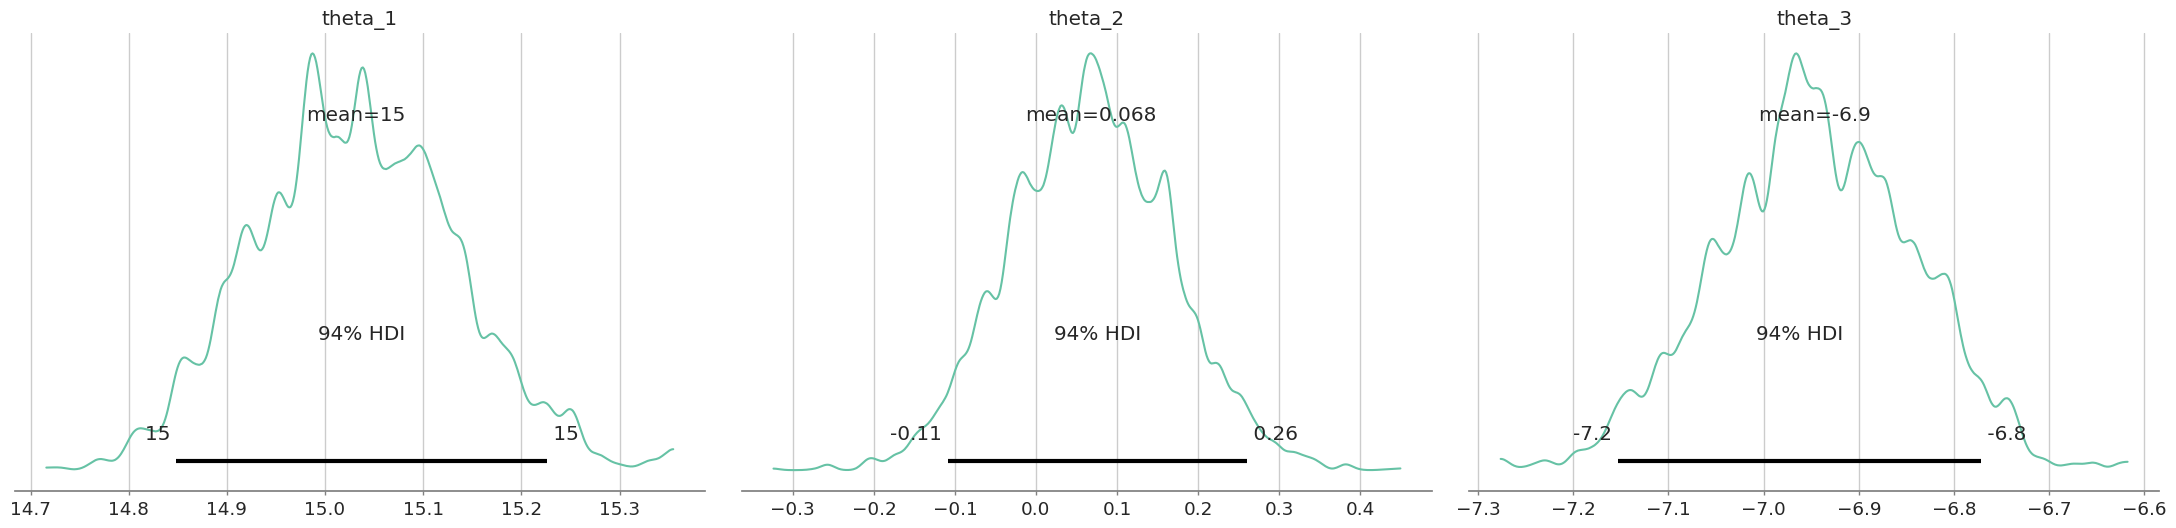

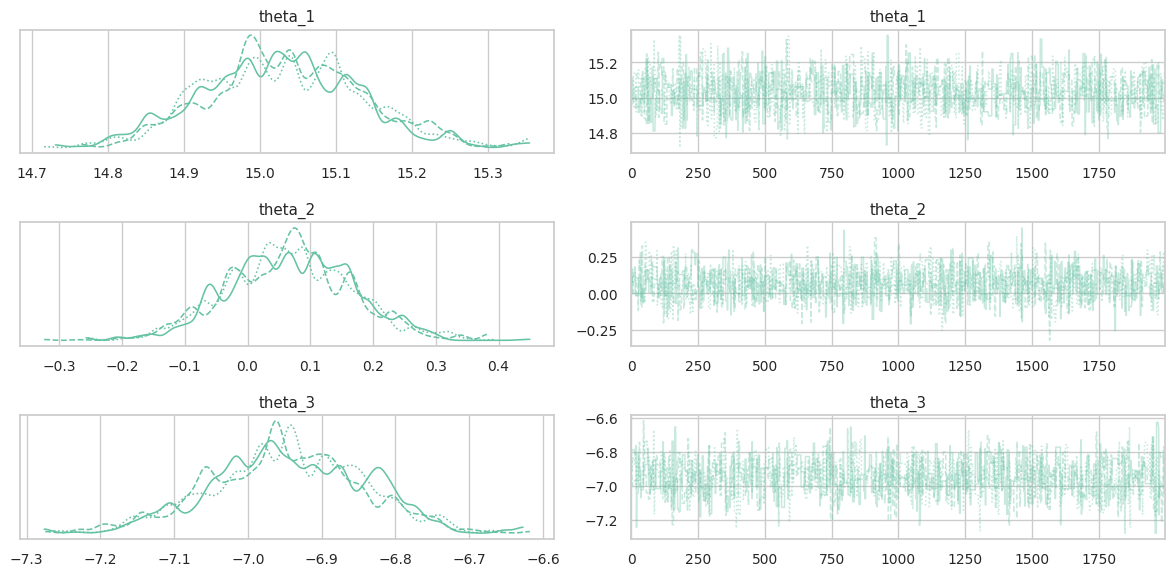

HamiltonianMC, chains=1


Sequential sampling (1 chains in 1 job)
HamiltonianMC: [theta_1, theta_2, theta_3, pi]
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/hmc/hmc.py:168: RuntimeWarning: overflow encountered in exp
  accept_stat = min(1, np.exp(-energy_change))
Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 4 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


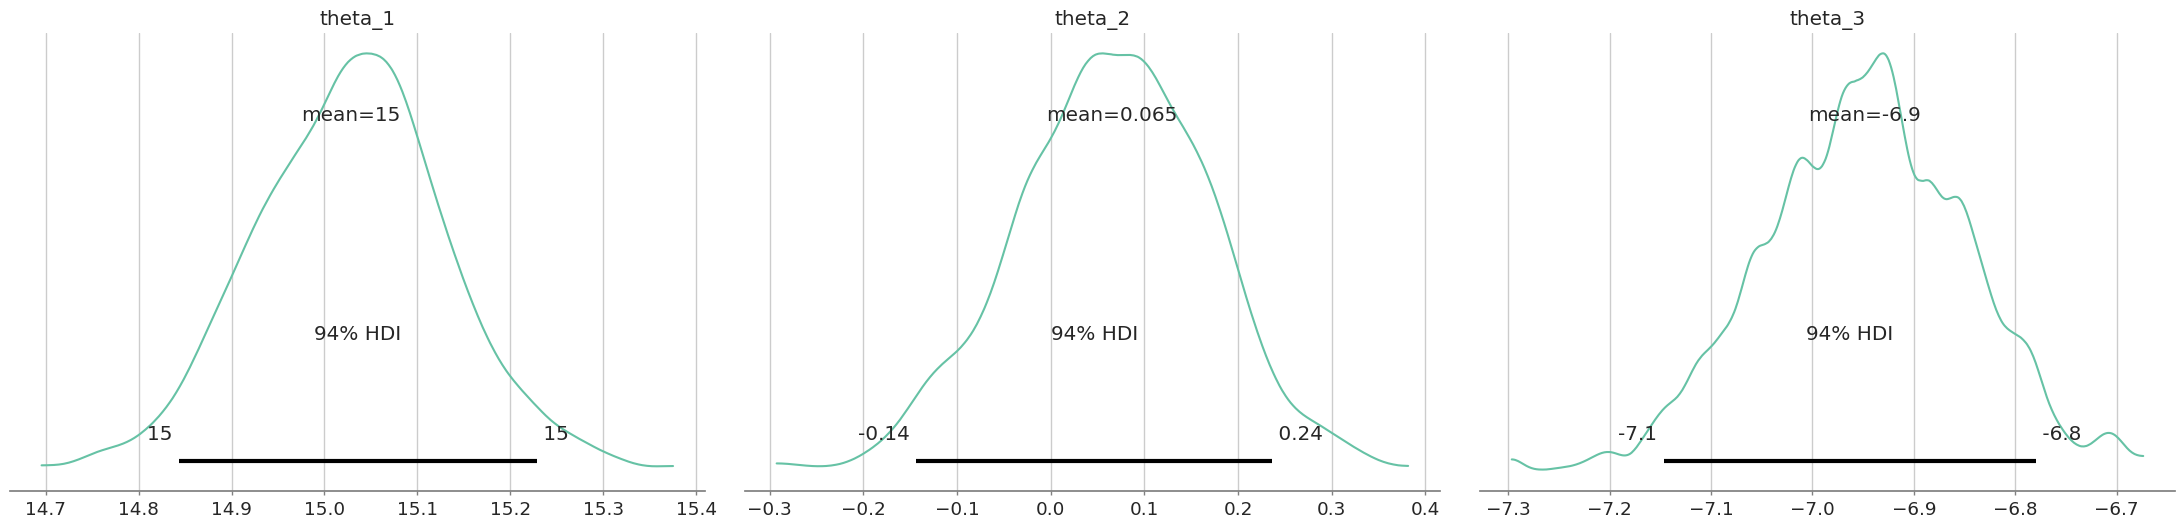

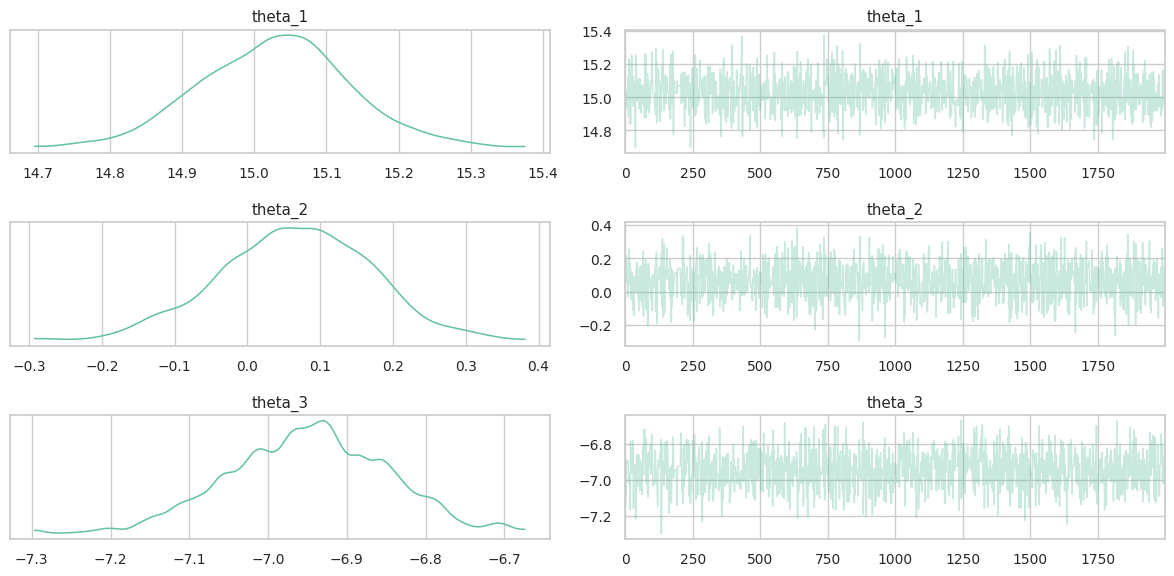

HamiltonianMC, chains=2


Multiprocess sampling (2 chains in 2 jobs)
HamiltonianMC: [theta_1, theta_2, theta_3, pi]
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/hmc/hmc.py:168: RuntimeWarning: overflow encountered in exp
  accept_stat = min(1, np.exp(-energy_change))
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


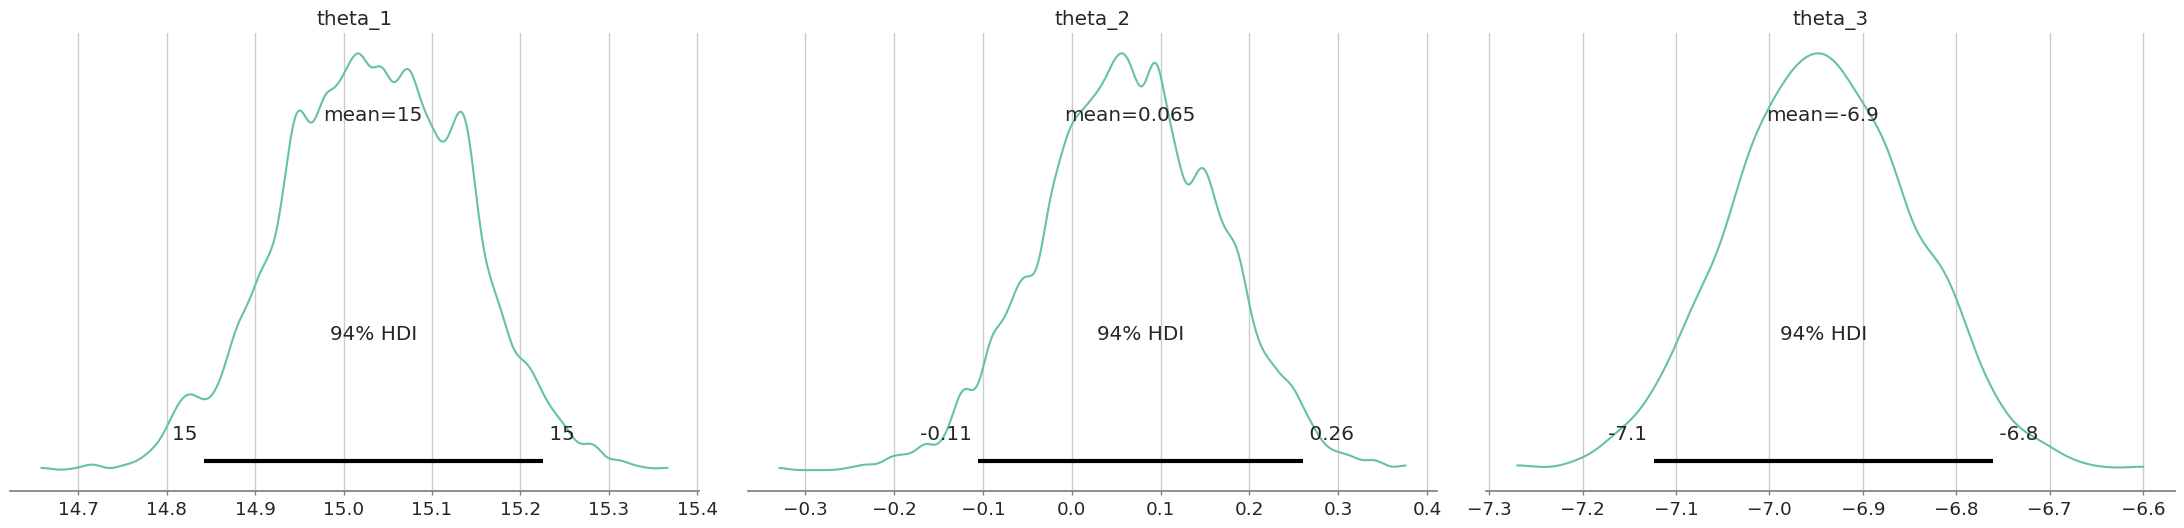

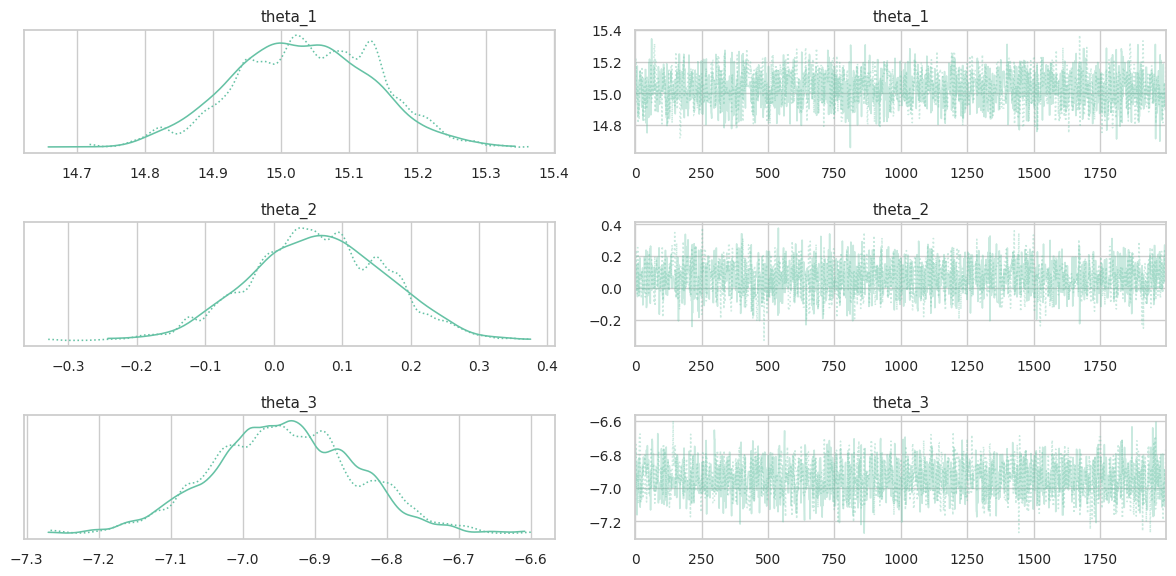

HamiltonianMC, chains=3


Multiprocess sampling (3 chains in 2 jobs)
HamiltonianMC: [theta_1, theta_2, theta_3, pi]
/home/alexander/.local/lib/python3.12/site-packages/pymc/step_methods/hmc/hmc.py:168: RuntimeWarning: overflow encountered in exp
  accept_stat = min(1, np.exp(-energy_change))
Sampling 3 chains for 1_000 tune and 2_000 draw iterations (3_000 + 6_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


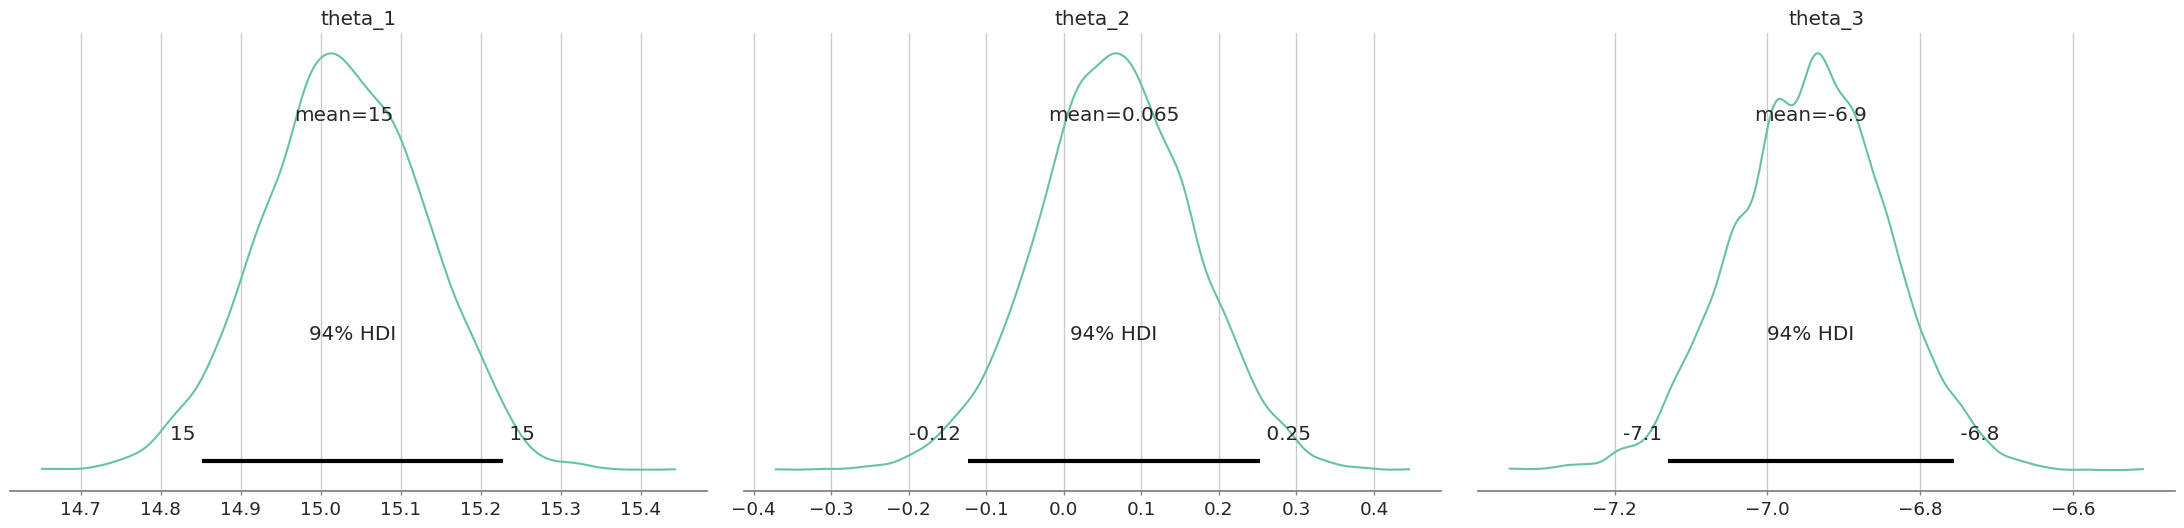

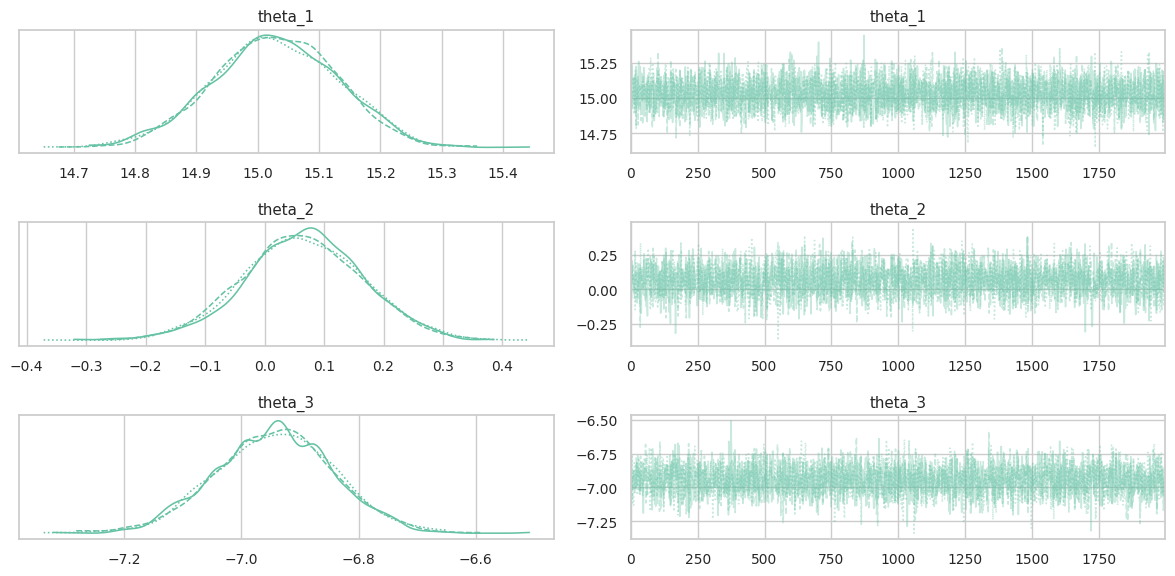

NUTS, chains=1


Sequential sampling (1 chains in 1 job)
NUTS: [theta_1, theta_2, theta_3, pi]
Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


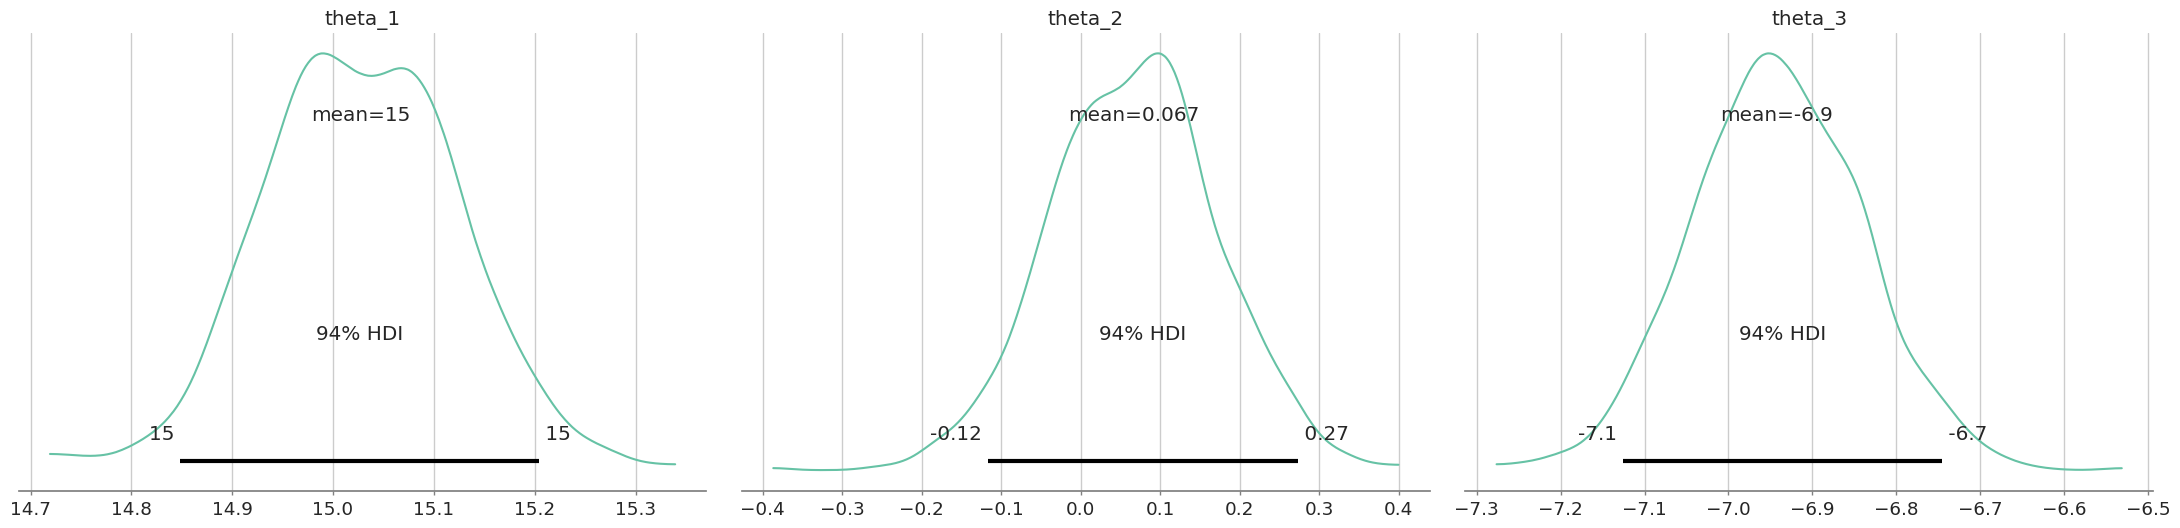

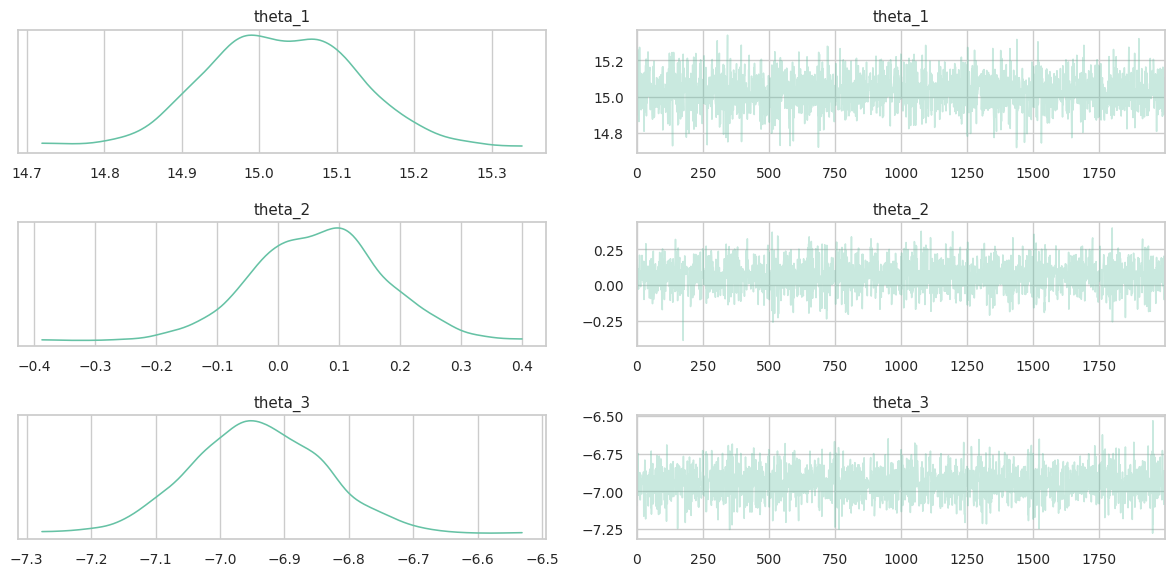

NUTS, chains=2


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta_1, theta_2, theta_3, pi]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


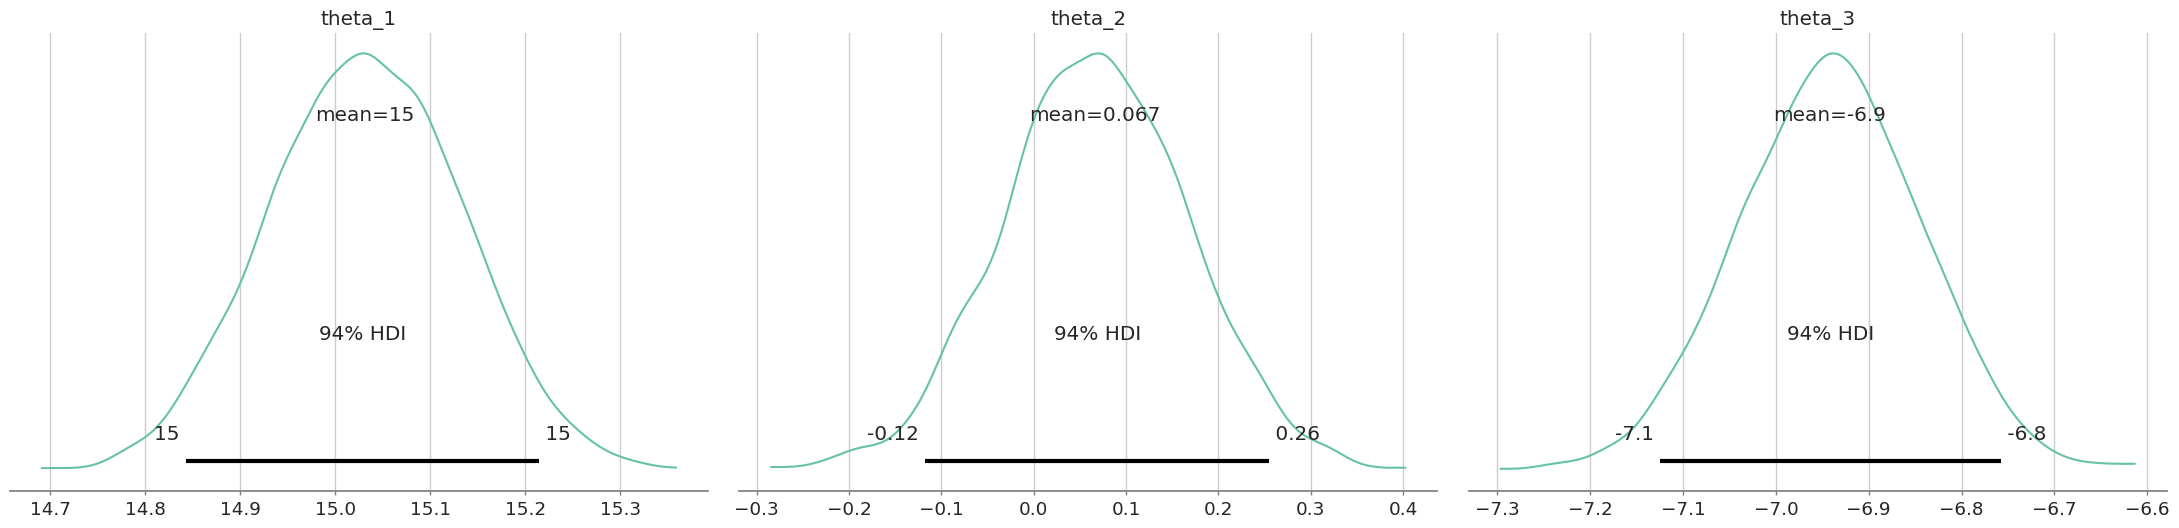

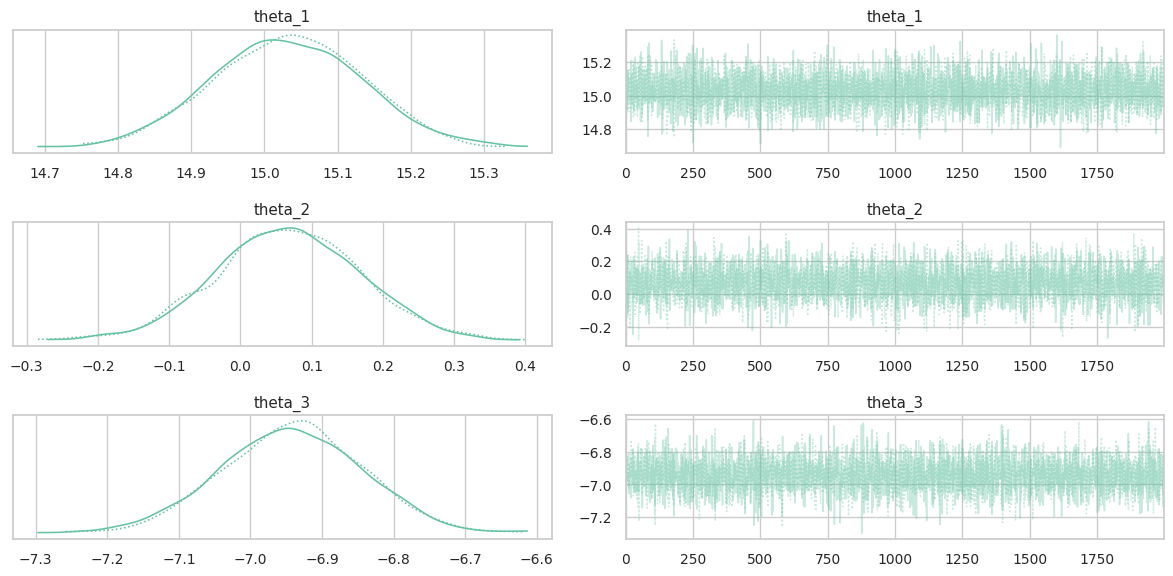

NUTS, chains=3


Multiprocess sampling (3 chains in 2 jobs)
NUTS: [theta_1, theta_2, theta_3, pi]
Sampling 3 chains for 1_000 tune and 2_000 draw iterations (3_000 + 6_000 draws total) took 20 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


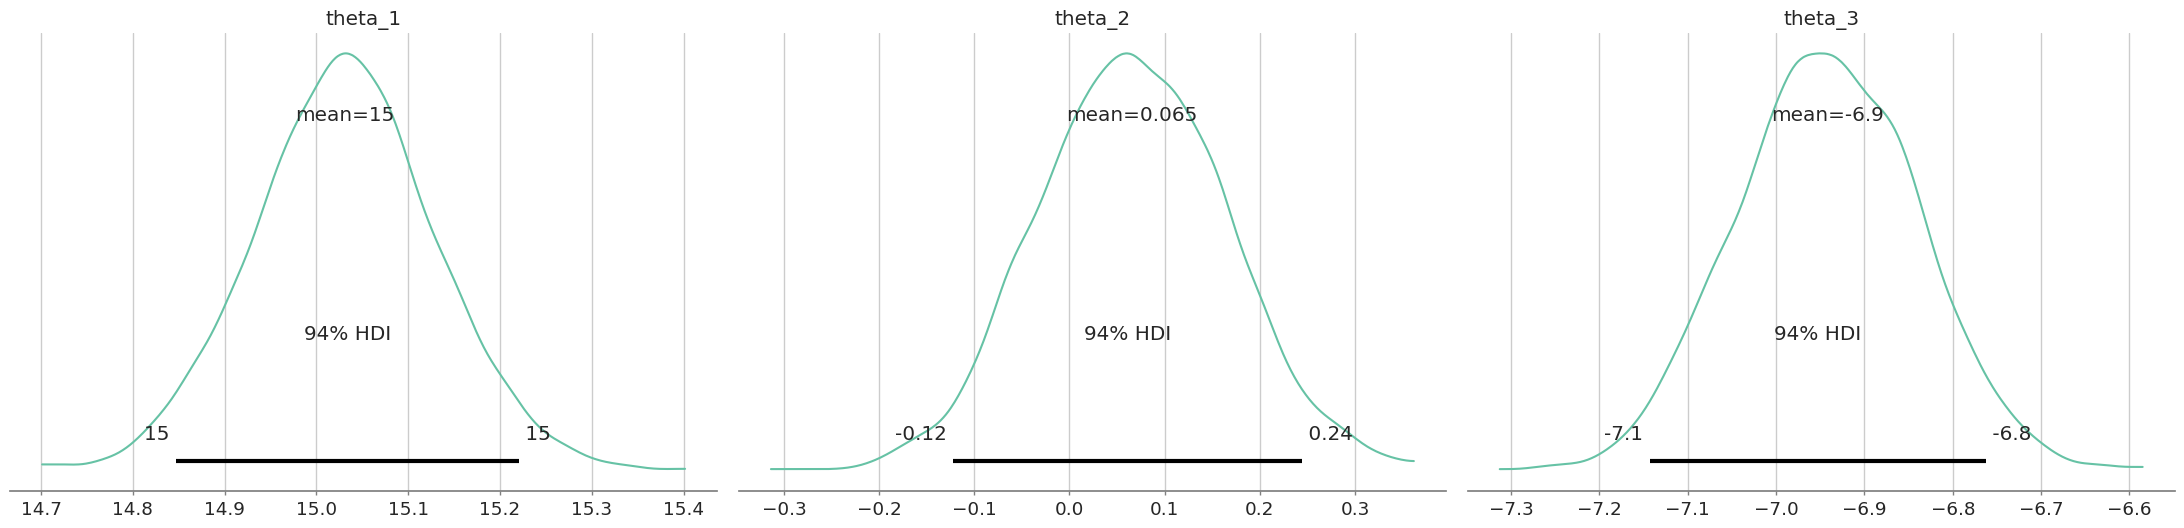

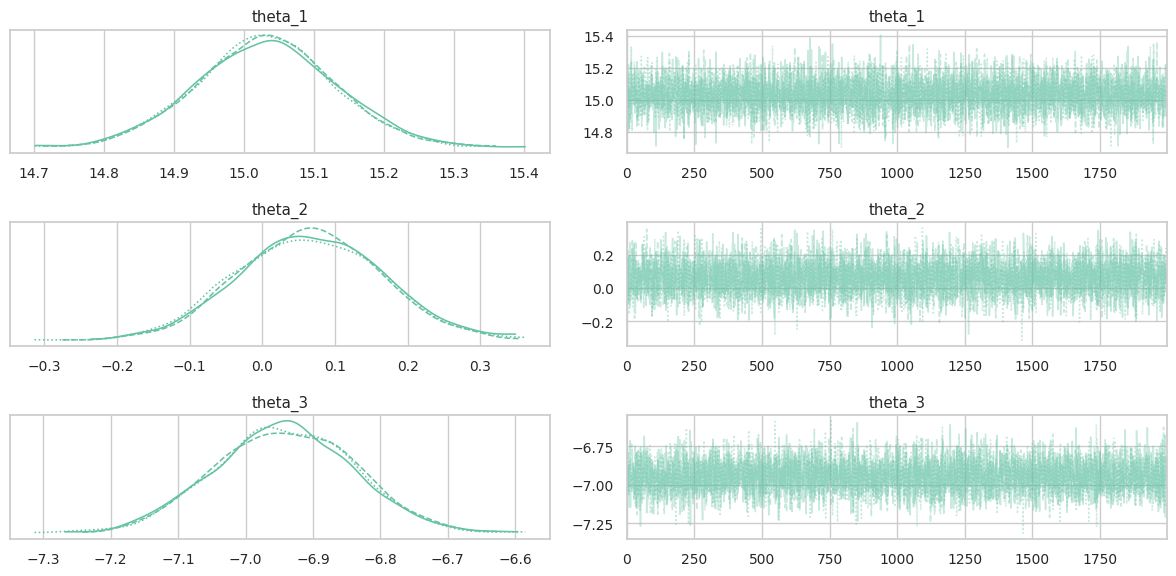

In [149]:
for name, sampler in zip(names, samplers):
    for chains in range(1, 4):
        print("=" * 100)
        print(f"{name}, chains={chains}")
        model, trace = model_mixture_fixed(X, sampler, chains)
        pm.plot_posterior(trace, var_names=["theta_1", "theta_2", "theta_3"])
        plt.tight_layout()
        plt.show()
        
        pm.plot_trace(trace, var_names=["theta_1", "theta_2", "theta_3"])
        plt.tight_layout()
        plt.show()
        

Сделайте выводы

Метрополис выдает достаточно рваное сэмплирование, в то время как гамильтон и NUTS дают более непрерывное.

Мы убедились, что в случае мультимодального распределения с использованием нескольких цепей необходимо по разному инициализировать априорные распределения.

__________________
### Задача 4

**1.** Загрузите данные `flats_moscow.csv` о стоимости квартир в Москве

In [226]:
data = pd.read_csv("flats_moscow.csv", sep="\t")
data.head()

n  price  totsp  livesp  kitsp  dist  metrdist  walk  brick  floor  code
0  1     81     58      40    6.0  12.5         7     1      1      1     3
1  2     75     44      28    6.0  13.5         7     1      0      1     6
2  3    128     70      42    6.0  14.5         3     1      1      1     3
3  4     95     61      37    6.0  13.5         7     1      0      1     1
4  5    330    104      60   11.0  10.5         7     0      1      1     3

Постройте график зависимости цены квартиры `price` от ее общей площади `totsp`. Что можно сказать о данных?

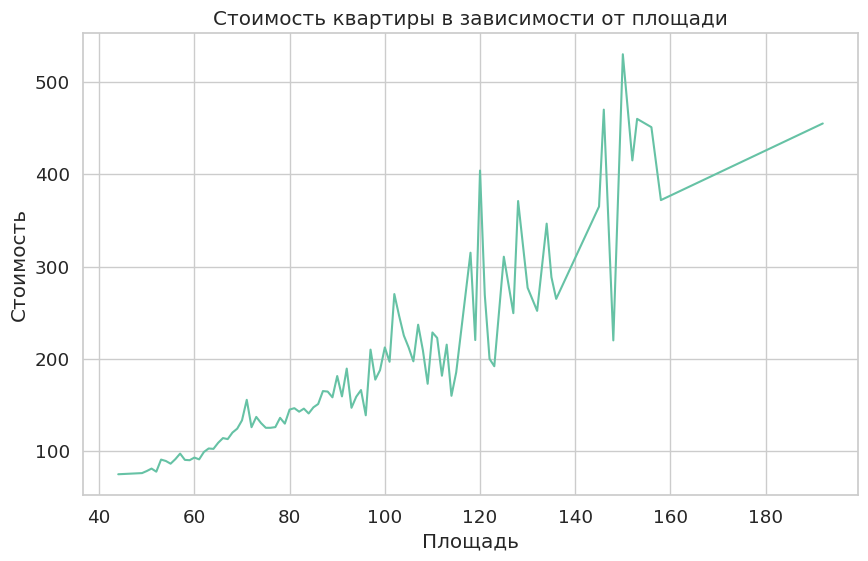

In [227]:
data.groupby('totsp')['price'].mean().plot(figsize=(10,6))
plt.title('Стоимость квартиры в зависимости от площади')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.grid(True)
plt.show()


Как видим, в данных мало квартир с большой площадью, из за чего график становится менее гладким.

**2.** Постройте с помощью PyMC линейную регрессию для предсказания цены квартиры `price` от ее общей площади `totsp`. Используйте следующие распределения:
* Априорное распределение на коэффициенты &mdash; нормальное с нулевым средним и среднеквадратичным разбросом 20.
* Ошибка имеет нормальное распределение с нулевым средним.
* Априорное распределение на дисперсию ошибки &mdash; модуль распределения Коши.

Запишите модель формулами:

$coef \sim \mathcal{N}(0, 20^2)$

$\sigma \sim |\mathcal{Cauchy}(0, 1)|$

$y_i = coef * totsp_i + \mathcal{N}(0, \sigma) \sim \mathcal{N}(\mu_i, \sigma)$, где $\mu_i = coef * totsp_i$

Реализуйте эту модель и проведите 3000 итераций семплирования

*Замечание:* для того, чтобы связать цену и площадь и иметь возможность далее предиктивно семплировать, вам понадобится опция `dims`

In [228]:
price = data["price"].values
totsp = data["totsp"].values

with pm.Model() as model:
    totsp_shared = pm.Data("totsp", totsp, dims="observed")
    
    k = pm.Normal("k", mu=0, sigma=20)
    b = pm.Normal("b", mu=0, sigma=20)
    eps_err = pm.HalfCauchy("eps_err", beta=1)
    
    mu = k * totsp_shared + b
    y = pm.Normal("y", mu=mu, sigma=eps_err, observed=price, dims="observed")
    
    trace = pm.sample(3000, chains=1, tune=1000, target_accept=0.9)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [k, b, eps_err]


Output()

Sampling 1 chain for 1_000 tune and 3_000 draw iterations (1_000 + 3_000 draws total) took 18 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Постройте `pm.plot_trace`. Что можно по нему сказать? Какое апострериорное распределение имеют параметры модели?

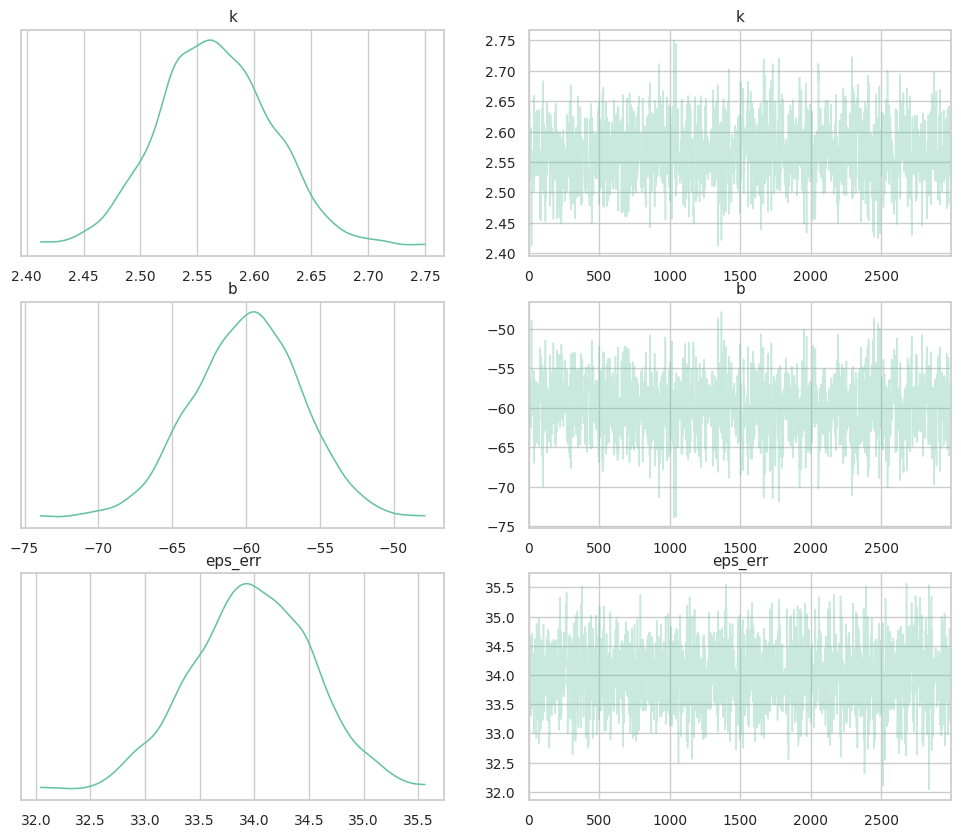

In [229]:
pm.plot_trace(trace, figsize=(12, 10));

Как видим параметры имеют нормальное распределение.

Как видим, коэффициент k положительный, что логично, с увеличением площади цена возрастает.

**3.** Постройте предсказательный интервал для каждого $x$, взяв область, в которую попадает 95% вероятностной массы апостериорного распределения. Иначе говоря, на основе построенной модели нужно для каждой площади квартиры $x$ вычислить 95%-й диаппазон цен на квартиры с такой мощностью.

Для выполнения этого пункта задайте сетку значений площади квартиры и с помощью `pm.sample_posterior_predictive` проведите семплирование из предиктивного распределения.

In [230]:
x_grid = np.linspace(40, 200, 100).astype(int)

with model:
    pm.set_data({"totsp": x_grid})
    posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"])

y_pred = posterior_predictive.posterior_predictive["y"].values[0]


Sampling: [y]


Output()

Какой размерности получится объект?

In [231]:
y_pred.shape

(3000, 100)

На основе полученных семплов постройте график предсказательного интервала. Для этого можно взять квантили у семплов для каждого $x$.

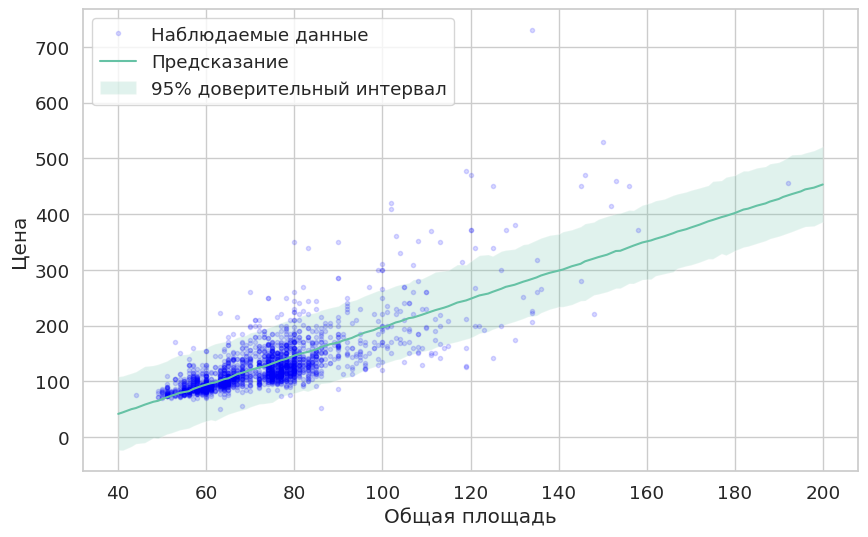

In [232]:
def plot_data_with_confidence_interval(data, x_grid, y_pred):
    y_vals = np.mean(y_pred, axis=0)
    y_lower = np.percentile(y_pred, 2.5, axis=0)
    y_upper = np.percentile(y_pred, 97.5, axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(data["totsp"], data["price"], ".", label="Наблюдаемые данные", alpha=0.15, color="blue")
    plt.plot(x_grid, y_vals, label="Предсказание")
    plt.fill_between(x_grid, y_lower, y_upper, alpha=0.2, label="95% доверительный интервал")
    plt.xlabel("Общая площадь")
    plt.ylabel("Цена")
    plt.legend()
    plt.show()

plot_data_with_confidence_interval(data, x_grid, y_pred)

Что вы можете сказать по этому графику?

Как видим, наша модель вполне угадала общий тренд. Ожидаемо, ввиду недопредставленности квартир с большой площадью, мы предсказываем для них хуже цену

**4.** Предложите способ, как исправить модель. Реализуйте эту модель, постройте для нее график предсказательного интервала.

Подправим дисперсию, что логично ввиду недостатка данных.

Также вместо линейной модели возьмем квадратичную

In [ ]:
with pm.Model() as model:
    totsp_shared = pm.Data("totsp", totsp, dims="observed")
    
    k1 = pm.Normal("k1", mu=0, sigma=20)
    k2 = pm.Normal("k2", mu=0, sigma=20)
    b = pm.Normal("b", mu=0, sigma=20)
    eps_err = pm.HalfCauchy("eps_err", beta=1)
    
    mu = k1 * totsp_shared + k2 * totsp_shared**2 + b
    sigma_err = eps_err * totsp_shared
    y = pm.Normal("y", mu=mu, sigma=sigma_err, observed=price, dims="observed")
    
    trace = pm.sample(3000, chains=1, tune=1000, target_accept=0.9)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [k1, k2, b, eps_err]


Output()

Sampling 1 chain for 1_000 tune and 3_000 draw iterations (1_000 + 3_000 draws total) took 85 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [238]:
with model:
    pm.set_data({"totsp": x_grid})
    posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"])

y_pred = posterior_predictive.posterior_predictive["y"].values[0]

Sampling: [y]


Output()

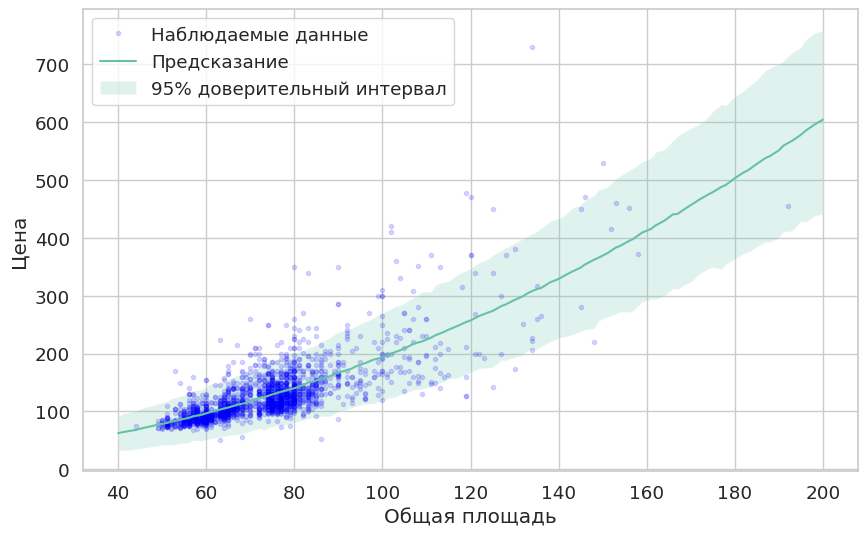

In [239]:
plot_data_with_confidence_interval(data, x_grid, y_pred)

**5.** Реализуйте ту же модель, взяв для ошибок распределение Стьюдента

In [240]:
with pm.Model() as model:
    totsp_shared = pm.Data("totsp", totsp, dims="observed")
    
    k1 = pm.StudentT("k1", nu=5, mu=0, sigma=20)
    k2 = pm.StudentT("k2", nu=5, mu=0, sigma=20)
    b = pm.StudentT("b", nu=5, mu=0, sigma=20)
    eps_err = pm.HalfCauchy("eps_err", beta=1)
    
    mu = k1 * totsp_shared + k2 * totsp_shared**2 + b
    sigma_err = eps_err * totsp_shared
    y = pm.Normal("y", mu=mu, sigma=sigma_err, observed=price, dims="observed")
    
    trace = pm.sample(3000, chains=1, tune=1000, target_accept=0.9)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [k1, k2, b, eps_err]


Output()

Sampling 1 chain for 1_000 tune and 3_000 draw iterations (1_000 + 3_000 draws total) took 116 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Sampling: [y]


Output()

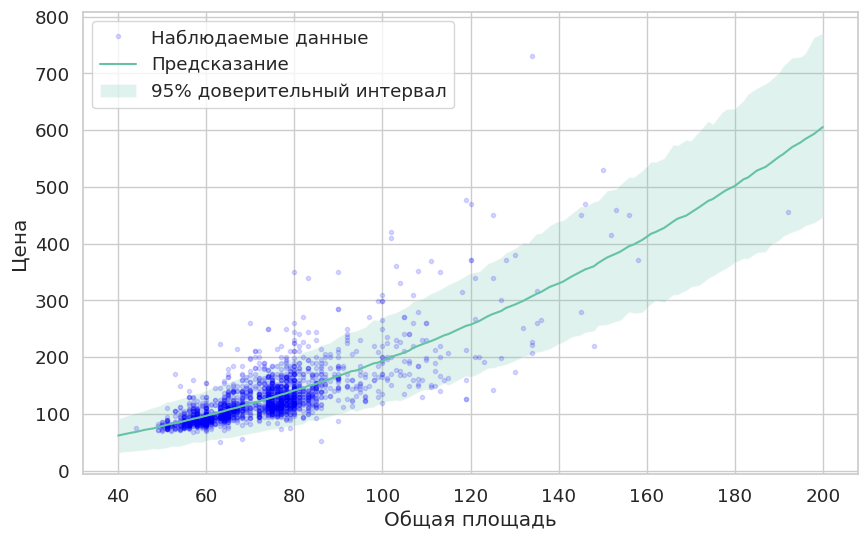

In [241]:
with model:
    pm.set_data({"totsp": x_grid})
    posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"])

y_pred = posterior_predictive.posterior_predictive["y"].values[0]
plot_data_with_confidence_interval(data, x_grid, y_pred)

Стало чуть лучше.

**6.** Теперь проведем небольшую аналитику. Допустим, мы хотим купить квартиру площадью 75 квадратных метров. Простройте график плотности предсказательного распределения цены такой квартиры. Посчитайте также вероятность того, что квартира площадью 75 квадратных метров имеет цену не более 100.

In [243]:
x_sp = 75

with model:
    pm.set_data({"totsp": np.array([x_sp])})
    posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"])

y_pred = posterior_predictive.posterior_predictive["y"].values[0]

Sampling: [y]


Output()

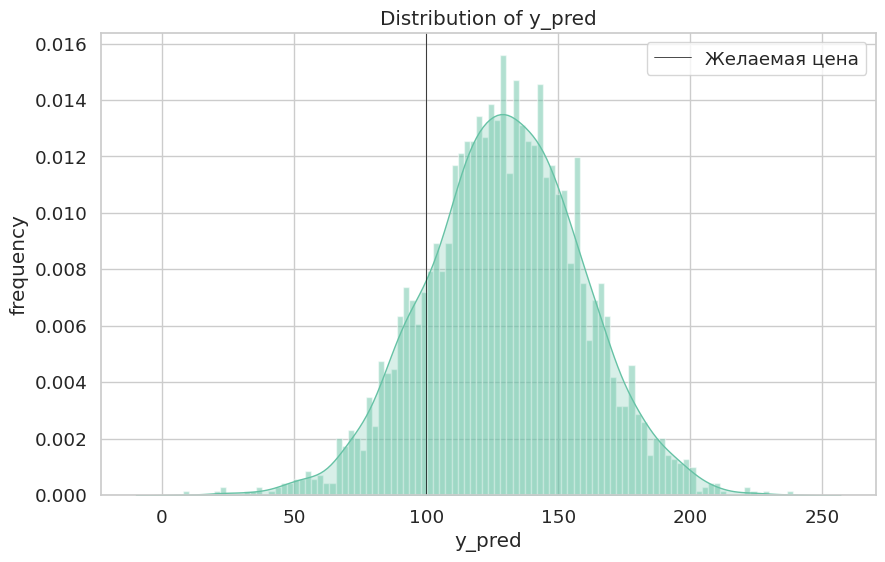

In [249]:
plt.figure(figsize=(10, 6))

plt.hist(y_pred, bins=100, density=True, alpha=0.5)
sns.kdeplot(y_pred, fill=True)
plt.axvline(100, color='black', linewidth=0.5, label="Желаемая цена")
plt.title('Distribution of y_pred')
plt.xlabel('y_pred')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [250]:
probs = y_pred < 100
print(f"Вероятность цены < 100: {np.mean(probs):.2%}")

Вероятность цены < 100: 15.87%


Насколько вообще изменяется цена квартиры при увеличении ее площади на 1 метр при фиксированных остальных признаках? Постройте для этого апостериорное распределение этого параметра, а также посчитайте среднее значение и 95%-й интервал

Мы используем квадратичную зависимость, т.е.
$$
y = k_1 \cdot totsp + k_2 \cdot totsp^2 + b + \epsilon
$$

Дифферинцируя по $totsp$, получаем:
$$
\frac{\partial y}{\partial totsp} = k_1 + 2k_2 \cdot totsp
$$


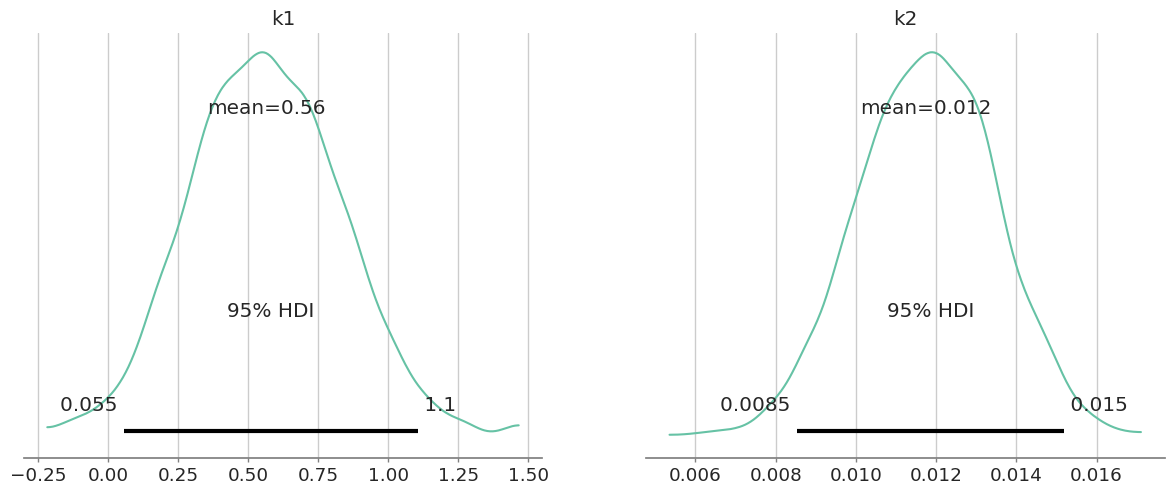

In [252]:
pm.plot_posterior(trace, var_names=['k1', 'k2'], hdi_prob=0.95);

Таким образом, цена при увеличинии totsp на 1 изменяется по следующему закону:
$$
\Delta y = 0.56 + 2 \cdot 0.012 \cdot totsp
$$

Сделайте выводы

Мы смогли построитьт модель корректно предсказывающую стоимость квартиры в зависимости от ее площади.

Также мы вывели формулу зависимости цены от увеличения площади квартиры на 1 метр. Как видим, она положительная и линейно зависит от площади.

### Задача 5

Пусть задана $X = (X_1, \ldots, X_n)$ &mdash; выборка из распределения $P \in \{P_t \,|\, t \in \Theta\}$. И пусть $q(t)$ &mdash; непрерывная априорная плотность $\theta$.

На занятии мы рассмотрели случаи проверки гипотез простая vs. простая и сложная (множественная) vs. сложная. Но что если мы хотим проверить гипотезу вида

$$\mathsf{H}_0\colon \theta=t_0\ \ vs.\ \ \mathsf{H}_1\colon \theta\{<, >, \neq\}t_0$$

Какая в таком случае возникает проблема?

Ответ: Вероятность того, что $\theta = t_0$ всегда равна нулю в случае непрерывного распределения.

Существует несколько способов решения данной проблемы:

**1. Модификация $\mathsf{H}_0$**

Самое простое, что мы можем сделать &mdash; расширить точечную гипотезу до множественной. Выберем интересующую нас практическую значимость $\varepsilon$. Тогда гипотеза принимает вид

$$\mathsf{H}_0\colon \theta\in \Theta_0=(t_0 - \varepsilon, t_0 + \varepsilon)\ \ vs.\ \ \mathsf{H}_1\colon \theta\notin\Theta_0$$

Это решение хорошо тем, что сводит задачу к уже рассмотренным и что связывает статистическую значимость с практической, ведь совсем маленькие отклонения нас в действительности могут не интересовать.

**2. Метод Линдли**

Этот метод сводит байесовский подход к частотному. Скажем, что будем **отвергать** $\mathsf{H}_0$ тогда и только тогда, когда $t_0 \notin (1-\alpha)$-HDR.

Данный подход также довольно прост засчет использования уже известных инструментов. Однако он нивелирует преимущество байесовского подхода, которое заключается в возможности подсчета вероятностей событий, связанных с нулевой гипотезой и параметром.

**3. Априорное распределение с атомом**

Рассмотрим априорное распределение $Q$, такое что:

* $\pi_0 = Q(\theta = t_0) > 0$
* При $t\neq t_0$ имеется плотность $\pi_1 q_1(t)$, где $\pi_1=1-\pi_0$ и $\int\limits_{\Theta_1} q_1(t) dt = 1$

Формул пугаться не стоит, на самом деле мы просто искуственно завысили вероятность в конкретной точке, сделав в ней разрыв функции распределения
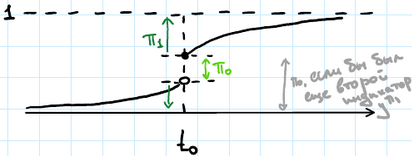

В данном способе мы во-первых сумели сохранить байесовость подхода, а во-вторых не изменили изначальный вид гипотезы. Попробуем вывести, как в данном случае будет выглядеть байесовский фактор. Вам необходимо дополнить пропуски в теоретических выкладках.

По формуле Байеса, апостериорная вероятность имеет вид $q(t|X) = \frac{1}{p(X)} \cdot q(t)p_t(X)$, где $p(X)$ &mdash; нормировочный коэффициент. Тогда отдельно по гипотезам имеем
$$q(t_0|X)=\frac{1}{p(X)} \cdot \pi_0 p_{t_0}(X)$$
$$\text{При } t\neq t_0 \text{ верно } q(t|X)=\frac{1}{p(X)} \pi_1q_1(t)p_t(X)$$

Тогда $\pi_0, \pi_1$ &mdash; априорные вероятности гипотез. Апостериорные вероятности:
$$p_0 = \pi_0 \cdot \frac{p_{t_0}(X)}{p(X)}$$
$$p_1 = \int\limits_{\Theta_1} q(t|X) dt = \pi_1 \cdot \int_{\Theta_1} \frac{q_1(t)p_t(X)}{p(X)} dt$$

И нормировочный коэффицент:
$$p(X) = \pi_0 \cdot p_{t_0}(X) + \pi_1 \cdot \int_{\Theta_1} q_1(t)p_t(X) dt$$

Наконец, можем расчитать байесовский фактор в пользу $\mathsf{H}_0$ против $\mathsf{H}_1$

$$\beta = \frac{p_0 / p_1}{\pi_0 / \pi_1} = \frac{p_{t_0}(X)}{\int_{\Theta_1} q_1(t)p_t(X) dt}$$

---
Перейдем от теории к практике. На ЧМ по футболу в 2010 году осьминог Пауль предсказывает результаты матчей с участием сборной Германии, выбирая кормушку с флагом страны-победителя. 
	Имеется выборка $X_1, ..., X_n \sim Bern(\theta)$ &mdash; результаты предсказания матчей (правильно или неправильно). Если Пауль предсказывает наугад, то $\theta=1/2$. Предсказание ненаугад означает $\theta>1/2$. Таким образом, проверяются гипотезы $\mathsf{H}_0\colon \theta=1/2\ \ vs.\ \ \mathsf{H}_1\colon \theta>1/2$.
	
По результатам 13 испытаний Пауль верно угадывает исход матча в 11 случаях. Проверьте гипотезы следующими способами
* Частотный подход, рассмотрев критерий на основе достаточной статистики. В ответе приведите критерий, включая пороговое значение, а также значение p-value.
* Байесовский подход с модификацией гипотез, при которой в гипотезе $\mathsf{H}_0$ рассматривается принадлежность окрестности точки 1/2. В качестве априорного распределения возьмите сопряжённое. В ответе приведите апостериорные вероятности гипотез и байесовский фактор.
* Метод Линдли. В качестве априорного распределения возьмите сопряжённое. В ответе приведите множество наибольшей плотности, а также результат проверки гипотез.
* Байесовский подход. Априорная вероятность $\mathsf{H}_0$ равна $\pi_0=1/2$, в качестве априорного распределения при справедливости $\mathsf{H}_1$ рассмотрите сопряжённое. В ответе приведите апостериорные вероятности гипотез и байесовский фактор.
	
*Замечания*
* Параметры априорного распределения выберите некоторым логичным для вас способом. Поясните свой выбор. Конечно же, они не должны зависеть от результатов эксперимента.
* При расчетах полезно использовать функцию `cdf` у распределений из `scipy.stats`.
* Не забывайте про нормировку вероятностей гипотез.

In [271]:
X = np.random.permutation([0] * 2 + [1] * 11)
theta = 0.5
n = 13

1) Частотный подход

Достаточной статистикой для распределения бернулли является сумма $T(X) = \sum_{i=1}^n X_i$, которая распределена биномиально $T(X) \sim \operatorname{Binomial}(n, p)$

In [268]:
T = np.sum(X)
mean0 = n * 0.5
std0 = np.sqrt(n * 0.5 * 0.5)

Z = (T - mean0) / std0

p_value = 1 - sps.norm.cdf(Z)
print(f"Z = {Z:.3f}, p-value ≈ {p_value:.4f}")

Z = 2.496, p-value ≈ 0.0063


Как видим, в частотном подходе мы не отвергаем нулевую гипотезу, что верно.

2) Байесовский подход с модификацией $\mathsf{H}_0$

Сопряженным к распределению бернулли является $Beta(a, b)$

Апостериорное распределение $q(t|X)$ имеет вид $Beta(a + T, b + n - T)$

In [300]:
epsilon = 0.05
a = 1
b = 1
q_aprior = sps.beta(a, b)
q_aposterior = sps.beta(a + T, b + n - T)

pi_0 = q_aprior.cdf(0.5 + epsilon) - q_aprior.cdf(0.5 - epsilon)
pi_1 = 1 - q_aprior.cdf(0.5 + epsilon)

p_0 = q_aposterior.cdf(0.5 + epsilon) - q_aposterior.cdf(0.5 - epsilon)

p_1 = 1 - q_aposterior.cdf(0.5 + epsilon)

beta_factor = (p_0 / p_1) / (pi_0 / pi_1) 
print(f"Вероятность H0: {p_0:.4f}")
print(f"Вероятность H1: {p_1:.4f}")
print(f"Beta factor: {beta_factor:.4f}")

Вероятность H0: 0.0149
Вероятность H1: 0.9830
Beta factor: 0.0680


Видим, что вероятность нулевой гипотезы низка.

3) Метод Линдли.

Возьмем $\alpha = 0.95$

In [283]:
alpha = 0.05

upper_bound = q_aposterior.ppf(1 - alpha)
lower_bound = q_aposterior.ppf(alpha)
print(f"HDR interval: [{lower_bound:.3f}, {upper_bound:.3f}]")
if 0.5 < lower_bound or 0.5 > upper_bound:
    print("Отвергаем H0")
else:
    print("Не получилось отвергнуть H0")

HDR interval: [0.615, 0.939]
Отвергаем H0


4) Байес с атомом.

In [309]:
pi_0 = 0.5
t_grid = np.linspace(0.5, 1, 1000)
p_0 = pi_0 * sps.binom.pmf(T, n, 0.5)
p_1 = (1 - pi_0) * np.trapz(q_aprior.pdf(t_grid) * sps.binom.pmf(T, n, t_grid), t_grid) # интегрирование методом трапеций
p = p_0 + p_1

beta_factor = (p_0 / p_1) / (pi_0 / (1 - pi_0))

print(f"Вероятность H0: {p_0 / p:.4f}")
print(f"Вероятность H1: {p_1 / p:.4f}")
print(f"Beta factor: {beta_factor:.4f}")

Вероятность H0: 0.1183
Вероятность H1: 0.8817
Beta factor: 0.1342


Не смотря на то что бета фактор стал чуть меньше, мы все равно скорее принимаем $H_0$

**Вывод:** Мы проверирили гипотезу несколькими способами, лучше всего себя показали байсовские методы и частотный подход.

Метод Линдли ошибочно отверг верную гипотезу.